## **IMDB Dataset for Movie Reviews (NLP Dataset)**
---

@Author: Ziyang Zhang (sidz314), Weichen Song (esswc), Chenkang Zhang (stezhang)

@Version: Dec 3, 2023


---

Dataset
---
The dataset used for this NLP task is IMDB dataset of Movie Reviews. This is a dataset for binary sentiment classification (Positive or Negative). The goal for this project is to predict the sentiment of reviews using either classification or deep learning algorithms.

- It can be accessed throught this [link](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data).


# Import Necessary Packages

In [ ]:
import warnings
warnings.filterwarnings("ignore")

seed = 42   # This will be the random seed used for the entire dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import random
random.seed(seed)

nltk.download('stopwords')
nltk.download('punkt')


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
torch.manual_seed(seed)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
torch.manual_seed(seed)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Data Loading

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

df = pd.read_csv('/content/drive/My Drive/CIS519/519_Project/imdb_dataset.csv')
print(df.shape)
df.head(10)

Mounted at /content/drive
(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
duplicate = df[df.duplicated(subset='review')]
duplicate

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


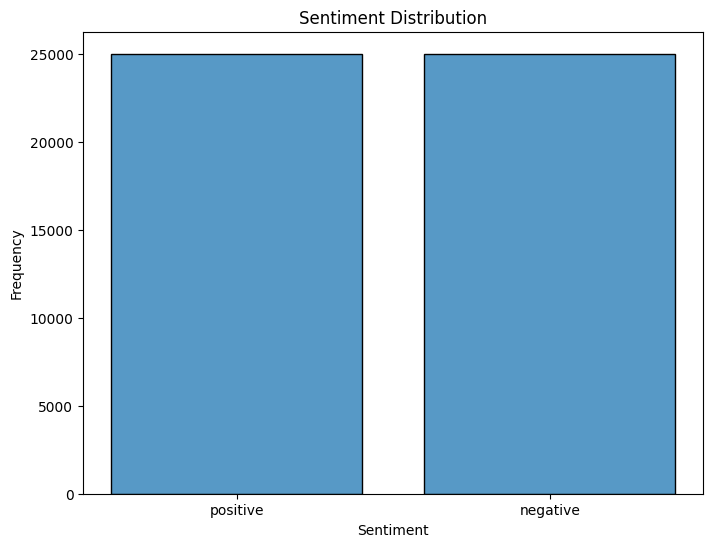

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='sentiment', discrete=True, shrink=0.8)

plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

# Text Preprocessing

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove square brackets and texts in between
    text = re.sub(r'\[[^]]*\]', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenization
    words = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Join the words back into a string
    text = ' '.join(words)

    return text

# Apply on the data
df['review'] = df['review'].apply(preprocess_text)
df

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive
...,...,...
49995,thought movi right good job wasnt creativ orig...,positive
49996,bad plot bad dialogu bad act idiot direct anno...,negative
49997,cathol taught parochi elementari school nun ta...,negative
49998,im go disagre previou comment side maltin one ...,negative


In [ ]:
# Preview an example
print(df['review'][0])

one review mention watch 1 oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom co

In [ ]:
# One_hot_encoded for sentitment label
class_to_num_mapping = {'positive': 1, 'negative': 0}

df['sentiment'] = df['sentiment'].replace(class_to_num_mapping)
df['sentiment'].unique()

array([1, 0])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=seed)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(40000,)
(10000,)


# Feature Engineering

In [ ]:
#@title TF-IDF (unigrams or bigrams)
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer_tfidf = TfidfVectorizer(ngram_range=(1, 1)) # unigrams
# vectorizer = TfidfVectorizer(ngram_range=(2, 2)) # bigrams
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

In [ ]:
X_train_tfidf.shape

(40000, 155876)

### Bag of Words

In [ ]:
#@title Bag of Words Vectorization
from sklearn.feature_extraction.text import CountVectorizer

cv_bow = CountVectorizer()
X_train_bow = cv_bow.fit_transform(X_train)
X_test_bow = cv_bow.transform(X_test)

### Word2Vec

In [ ]:
#@title Word2Vec Vectorization
from gensim.models import Word2Vec

# Create word2vec model
sentences = [sentence.split() for sentence in X_train]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

# Vectorization
def vectorize(sentence):
    words = sentence.split()
    words_v = np.array([w2v_model.wv[word] for word in words if word in w2v_model.wv])
    if len(words_v) == 0:
        return np.zeros(100)
    return words_v.mean(axis=0)

X_train_w2v = np.array([vectorize(sentence) for sentence in X_train])
X_test_w2v = np.array([vectorize(sentence) for sentence in X_test])

# Modeling (Traditional Pipeline)


---

We will be using XGBoost for our tradional pipeline on this NLP task.

Performance Using TF-IDF Features

Accuracy: 0.8598
Precision: 0.8484
Recall: 0.8787
F1 Score: 0.8633

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4961
           1       0.85      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



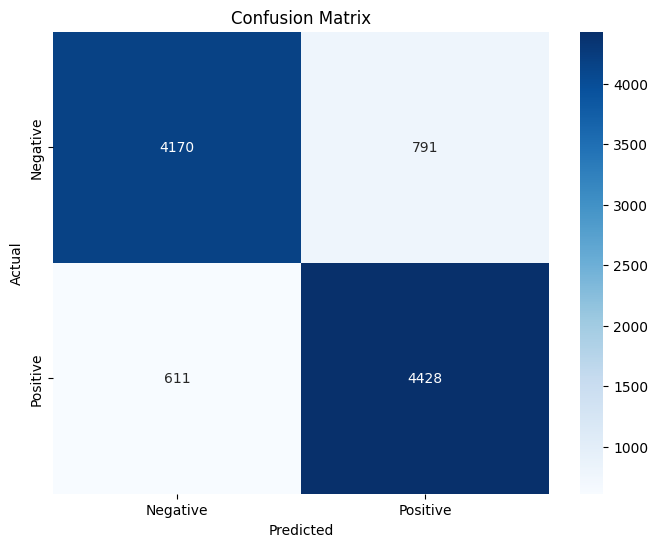

In [ ]:
# Initialize and train the XGBoost classifier
xgb_classifier_tfidf = XGBClassifier(random_state=seed)
xgb_classifier_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = xgb_classifier_tfidf.predict(X_test_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Predictions on the training set
y_train_pred = xgb_classifier_tfidf.predict(X_train_tfidf)

# Calculate and print the training accuracy
training_accuracy = accuracy_score(y_train_pred, y_train)
print(f"Training Accuracy: {training_accuracy:.4f}")

Training Accuracy: 0.9290


Performance Using Bag of Words Features

Accuracy: 0.8597
Precision: 0.8458
Recall: 0.8825
F1 Score: 0.8637

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4961
           1       0.85      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



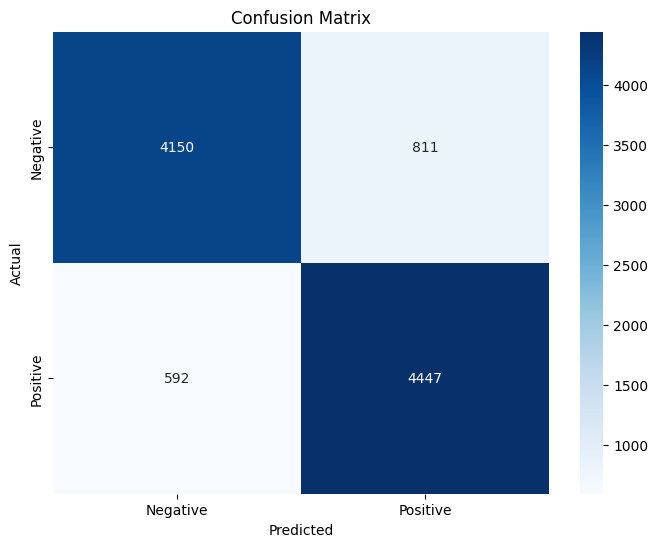

In [ ]:
# Initialize and train the XGBoost classifier
xgb_classifier_bow = XGBClassifier(random_state=seed)
xgb_classifier_bow.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred = xgb_classifier_bow.predict(X_test_bow)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Predictions on the training set
y_train_pred = xgb_classifier_bow.predict(X_train_bow)

# Calculate and print the training accuracy
training_accuracy = accuracy_score(y_train_pred, y_train)
print(f"Training Accuracy: {training_accuracy:.4f}")

Training Accuracy: 0.9190


Performance Using Word2Vec Features


Accuracy: 0.8452
Precision: 0.8417
Recall: 0.8533
F1 Score: 0.8475

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4961
           1       0.84      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



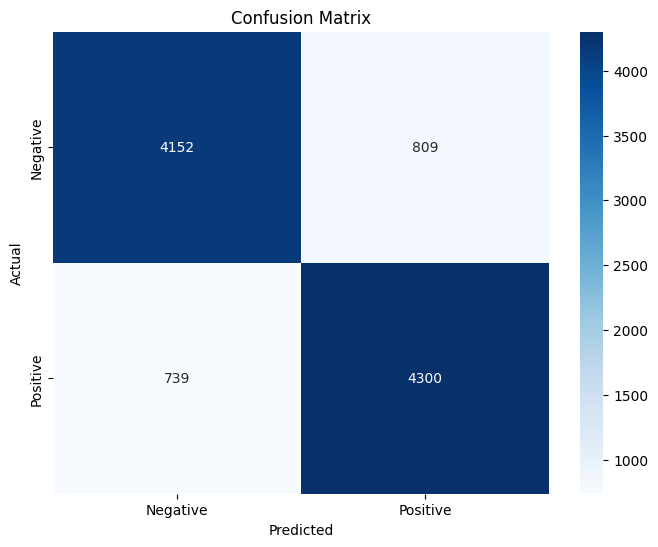

In [ ]:
# Initialize and train the XGBoost classifier
xgb_classifier_w2v = XGBClassifier(random_state=seed)
xgb_classifier_w2v.fit(X_train_w2v, y_train)

# Make predictions on the test set
y_pred = xgb_classifier_w2v.predict(X_test_w2v)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Predictions on the training set
y_train_pred = xgb_classifier_w2v.predict(X_train_w2v)

# Calculate and print the training accuracy
training_accuracy = accuracy_score(y_train_pred, y_train)
print(f"Training Accuracy: {training_accuracy:.4f}")

Training Accuracy: 0.9657


Here, we see that XGB classifier perform the best on the training set but it does not perform the best on the test set. This might raise the concern of overfitting. Let's try regularization to see if the model's performance would improve.

Best Hyperparameters: {'reg_alpha': 1.0, 'reg_lambda': 1.0}
Accuracy: 0.8485
Precision: 0.8445
Recall: 0.8571
F1 Score: 0.8508

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.84      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



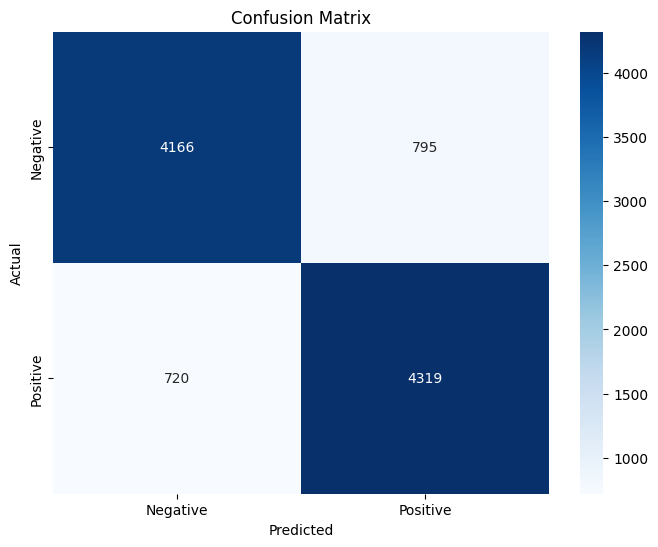

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'reg_lambda': [0.1, 0.5, 1.0],
    'reg_alpha': [0.1, 0.5, 1.0]
}

# Initialize the Grid Search
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=seed),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3)

grid_search.fit(X_train_w2v, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_w2v)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8847
Precision: 0.8774
Recall: 0.8964
F1 Score: 0.8868

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



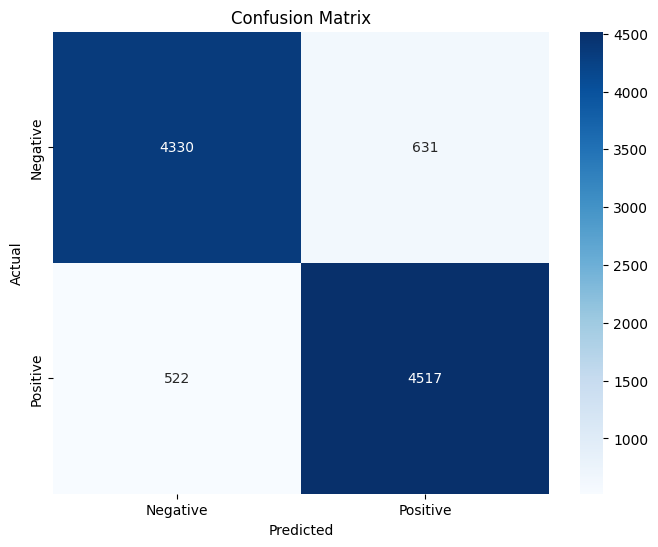

In [ ]:
#@title Logistic Regression on BOW features
model_bow = LogisticRegression(random_state=seed)

model_bow.fit(X_train_bow, y_train)

y_pred = model_bow.predict(X_test_bow)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8903
Precision: 0.8792
Recall: 0.9069
F1 Score: 0.8928

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



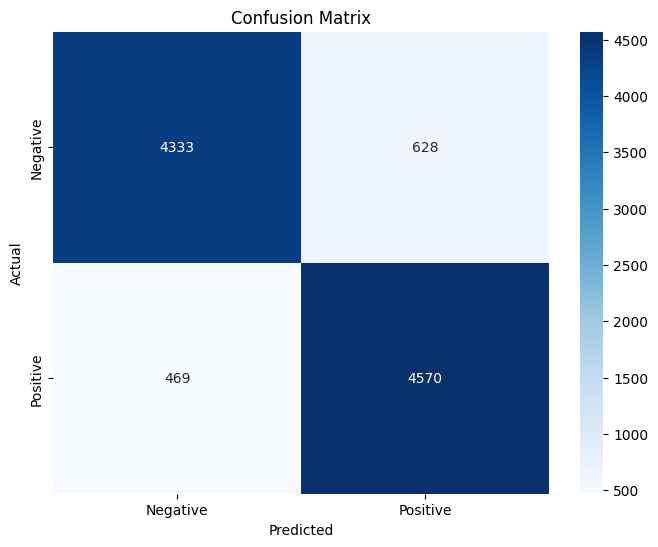

In [ ]:
#@title Logistic Regression on TFIDF features
model_tfidf = LogisticRegression(random_state=seed)

model_tfidf.fit(X_train_tfidf, y_train)

y_pred = model_tfidf.predict(X_test_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Hyperparameter Search for XGBoost (Traditional)

Best Parameters:
{'max_depth': 7}
Accuracy: 0.8614
Precision: 0.8500
Recall: 0.8803
F1 Score: 0.8649

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4961
           1       0.85      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



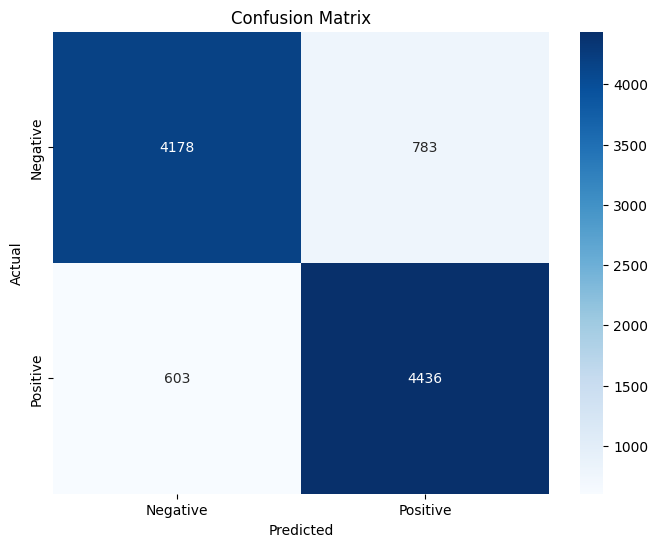

In [ ]:
# Define the parameter grid to search
param_grid = {
    'max_depth': range(4,10,1),
}

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier(random_state=seed)

# Create GridSearchCV object
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train_bow, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:")
print(best_params)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_bow)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Best Parameters:
{'max_depth': 9, 'min_child_weight': 7}
Accuracy: 0.8650
Precision: 0.8559
Recall: 0.8803
F1 Score: 0.8679

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4961
           1       0.86      0.88      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



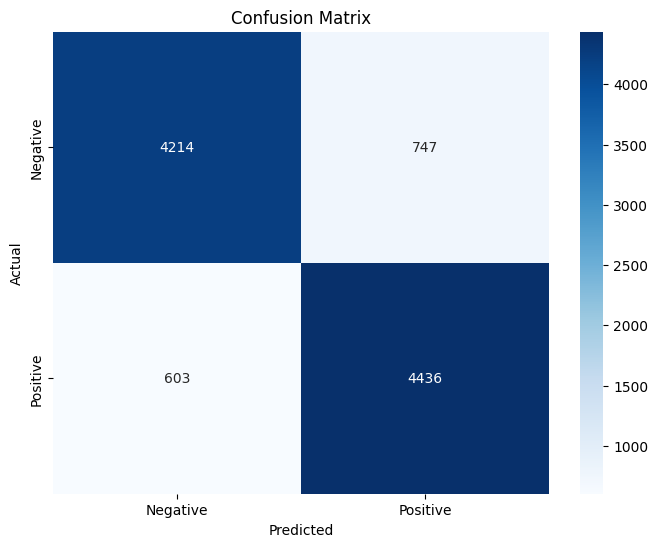

In [ ]:
# Define the parameter grid to search
param_grid = {
    'max_depth': range(4,10,1),
    'min_child_weight':range(1,8,2),
}

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier(random_state=seed)

# Create GridSearchCV object
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:")
print(best_params)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8650
Precision: 0.8559
Recall: 0.8803
F1 Score: 0.8679

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4961
           1       0.86      0.88      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



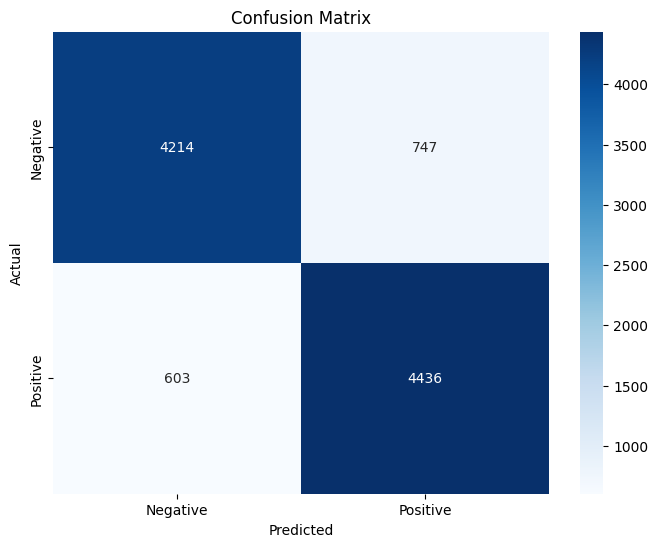

In [ ]:
# Initialize and train the XGBoost classifier
xgb_classifier_tfidf_tuned = XGBClassifier(random_state=seed, max_depth=9, min_child_weight=7)
xgb_classifier_tfidf_tuned.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = xgb_classifier_tfidf_tuned.predict(X_test_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .................................min_child_weight=1; total time= 1.5min
[CV] END .................................min_child_weight=1; total time= 1.3min
[CV] END .................................min_child_weight=1; total time= 1.4min
[CV] END .................................min_child_weight=3; total time=  59.1s
[CV] END .................................min_child_weight=3; total time= 1.1min
[CV] END .................................min_child_weight=3; total time= 1.1min
[CV] END .................................min_child_weight=5; total time=  54.7s
[CV] END .................................min_child_weight=5; total time=  54.6s
[CV] END .................................min_child_weight=5; total time=  55.4s
[CV] END .................................min_child_weight=7; total time=  50.7s
[CV] END .................................min_child_weight=7; total time=  56.4s
[CV] END .................................min_chi

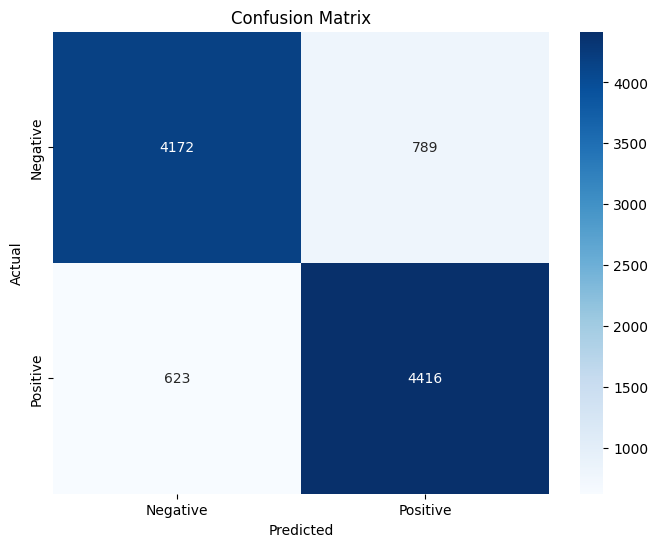

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid to search
param_grid = {
    'min_child_weight':range(1,8,2)
}

# Initialize XGBoost classifier (With what we tune for 'max_depth')
xgb_classifier = XGBClassifier(random_state=42, max_depth=7)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_classifier, param_grid, scoring='accuracy', n_iter=10, cv=3, verbose=2, random_state=seed)

# Perform the grid search
random_search.fit(X_train_bow, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print the best parameters
print("Best Parameters:")
print(best_params)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_bow)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# XGBoost On GloVe

In [ ]:
#@title Download GloVe word embeddings

# === Download GloVe word embeddings
# !wget http://nlp.stanford.edu/data/glove.6B.zip

# === Unzip word embeddings and use only the top 50000 word embeddings for speed
# !unzip glove.6B.zip
# !head -n 50000 glove.6B.300d.txt > glove.6B.300d__50k.txt

# === Download Preprocessed version
!wget https://docs.google.com/uc?id=1KMJTagaVD9hFHXFTPtNk0u2JjvNlyCAu -O glove_split.aa
!wget https://docs.google.com/uc?id=1LF2yD2jToXriyD-lsYA5hj03f7J3ZKaY -O glove_split.ab
!wget https://docs.google.com/uc?id=1N1xnxkRyM5Gar7sv4d41alyTL92Iip3f -O glove_split.ac
!cat glove_split.?? > 'glove.6B.300d__50k.txt'

--2023-11-15 20:05:00--  https://docs.google.com/uc?id=1KMJTagaVD9hFHXFTPtNk0u2JjvNlyCAu
Resolving docs.google.com (docs.google.com)... 172.217.203.100, 172.217.203.102, 172.217.203.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/73sbeg3390ogcubjmqle547vppkli0ai/1700078700000/14514704803973256873/*/1KMJTagaVD9hFHXFTPtNk0u2JjvNlyCAu?uuid=53483564-bb64-48fa-8ffd-1de02519aaad [following]
--2023-11-15 20:05:11--  https://doc-0k-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/73sbeg3390ogcubjmqle547vppkli0ai/1700078700000/14514704803973256873/*/1KMJTagaVD9hFHXFTPtNk0u2JjvNlyCAu?uuid=53483564-bb64-48fa-8ffd-1de02519aaad
Resolving doc-0k-0g-docs.googleusercontent.com (doc-0k-0g-docs.googleusercontent.com)... 142.250.98.132, 2607:f8b0:400c:c1a::84
Connecting to doc-0k-

In [ ]:
# Define Function for storing and loading our embedding
def load_glove(glove_path, embedding_dim):
    with open(glove_path) as f:
        token_ls = [PAD_TOKEN, UNK_TOKEN]
        embedding_ls = [np.zeros(embedding_dim), np.random.rand(embedding_dim)]
        for line in f:
            token, raw_embedding = line.split(maxsplit=1)
            token_ls.append(token)
            embedding = np.array([float(x) for x in raw_embedding.split()])
            embedding_ls.append(embedding)
        embeddings = np.array(embedding_ls)
    return token_ls, embeddings

PAD_TOKEN = '<PAD>'
UNK_TOKEN = '<UNK>'
EMBEDDING_DIM=300 # dimension of Glove embeddings
glove_path = "glove.6B.300d__50k.txt"
vocab, embeddings = load_glove(glove_path, EMBEDDING_DIM)

In [ ]:
!pip install sacremoses

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 10.6 MB/s eta 0:00:00


In [ ]:
import sacremoses
from tqdm.auto import tqdm
import string

def tokenize_stopword_remove(data, labels, tokenizer, vocab, max_seq_length=1000):
    # Load all stopwords and puncuation
    stopwords_punct = set(stopwords.words('english')+list(string.punctuation))
    vocab_to_idx = {word: i for i, word in enumerate(vocab)}
    text_data = []
    label_data = []
    for ex in tqdm(data):
        tokenized = tokenizer.tokenize(ex.lower())
        tokenized_stopword_free = [token for token in tokenized if token not in stopwords_punct]
        ids = [vocab_to_idx.get(token, 1) for token in tokenized_stopword_free]
        text_data.append(ids)
    return text_data, labels

# Using preload GLoVe Embedding to tokenize
tokenizer = sacremoses.MosesTokenizer()
train_data_indices, train_labels = tokenize_stopword_remove(X_train.to_numpy(), y_train.to_numpy(), tokenizer, vocab)
test_data_indices, test_labels = tokenize_stopword_remove(X_test.to_numpy(), y_test.to_numpy(), tokenizer, vocab)

  0%|          | 0/40000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
length_list = []
for foo in train_data_indices:
  length_list.append(len(foo))
print(np.mean(length_list))
print(np.max(length_list))
print(np.min(length_list))

118.95695
1426
4


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_data_indices = pad_sequences(train_data_indices, maxlen=200, padding='post', truncating='post', value=0)
test_data_indices = pad_sequences(test_data_indices, maxlen=200, padding='post', truncating='post', value=0)

Accuracy: 0.5769
Precision: 0.5782
Recall: 0.5926
F1 Score: 0.5853

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.56      0.57      4961
           1       0.58      0.59      0.59      5039

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.58      0.58     10000



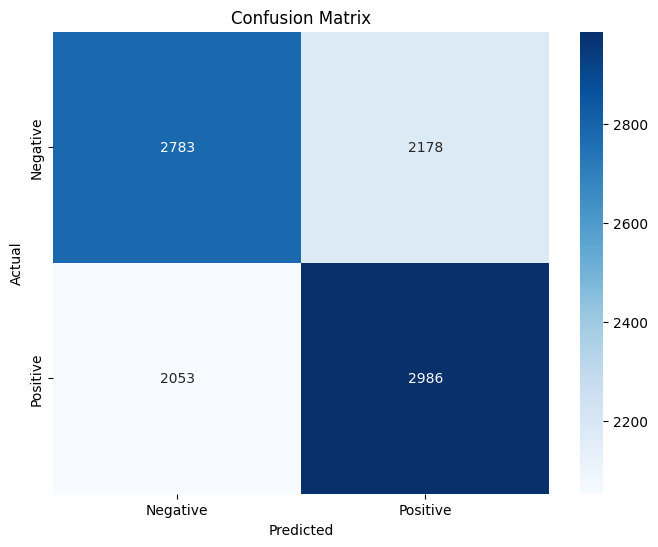

In [ ]:
#@title Training XGBoost on GloVe
# Initialize and train the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(train_data_indices, train_labels)

# Make predictions on the test set
y_pred = xgb_classifier.predict(test_data_indices)

# Calculate metrics
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(test_labels, y_pred))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_labels, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Predictions on the training set
y_train_pred = xgb_classifier.predict(train_data_indices)

# Calculate and print the training accuracy
training_accuracy = accuracy_score(y_train_pred, train_labels)
print(f"Training Accuracy: {training_accuracy:.4f}")

Training Accuracy: 0.8795


#Dataset Shifts for Traditional Pipeline

In [ ]:
Wis#@title Test on Original Review (no preprocessing)
df_shift = pd.read_csv('/content/drive/My Drive/CIS519/519_Project/imdb_dataset.csv')

# One_hot_encoded for sentitment label
class_to_num_mapping = {'positive': 1, 'negative': 0}
df_shift['sentiment'] = df_shift['sentiment'].replace(class_to_num_mapping)

# Split the data into training and testing sets
X_train_shift, X_test_shift, y_train_shift, y_test_shift = train_test_split(df_shift['review'], df_shift['sentiment'], test_size=0.2, random_state=seed)

# TF-IDF Vectorization
X_test_shift_tfidf = vectorizer_tfidf.transform(X_test_shift)

# Bag of Words
X_test_shift_bow = cv_bow.transform(X_test_shift)

# Word2Vec
X_test_shift_w2v = np.array([vectorize(sentence) for sentence in X_test_shift])

Accuracy: 0.6726
Precision: 0.6109
Recall: 0.9649
F1 Score: 0.7481

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.38      0.53      4961
           1       0.61      0.96      0.75      5039

    accuracy                           0.67     10000
   macro avg       0.76      0.67      0.64     10000
weighted avg       0.76      0.67      0.64     10000



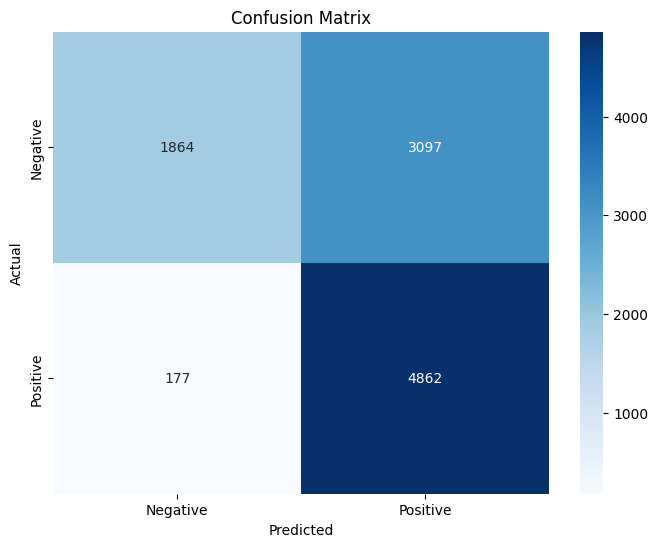

In [ ]:
# TFIDF
y_pred = xgb_classifier_tfidf.predict(X_test_shift_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8270
Precision: 0.8075
Recall: 0.8623
F1 Score: 0.8340

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      4961
           1       0.81      0.86      0.83      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



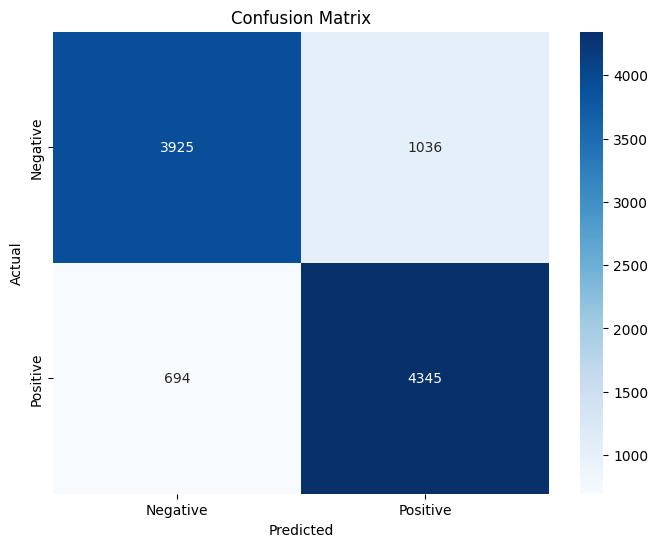

In [ ]:
# TFIDF (Logistic Regression)
y_pred = model_tfidf.predict(X_test_shift_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.6854
Precision: 0.6220
Recall: 0.9577
F1 Score: 0.7542

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.41      0.56      4961
           1       0.62      0.96      0.75      5039

    accuracy                           0.69     10000
   macro avg       0.76      0.68      0.66     10000
weighted avg       0.76      0.69      0.66     10000



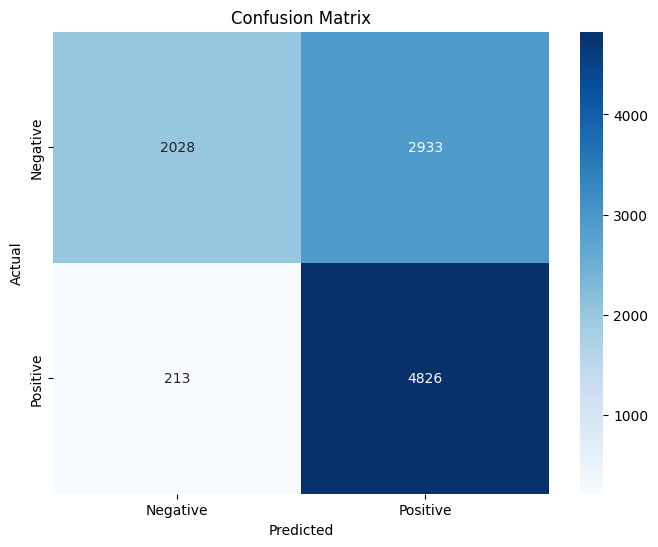

In [ ]:
# TFIDF (Tuned XGBoost)
y_pred = xgb_classifier_tfidf_tuned.predict(X_test_shift_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7839
Precision: 0.7306
Recall: 0.9047
F1 Score: 0.8084

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      4961
           1       0.73      0.90      0.81      5039

    accuracy                           0.78     10000
   macro avg       0.80      0.78      0.78     10000
weighted avg       0.80      0.78      0.78     10000



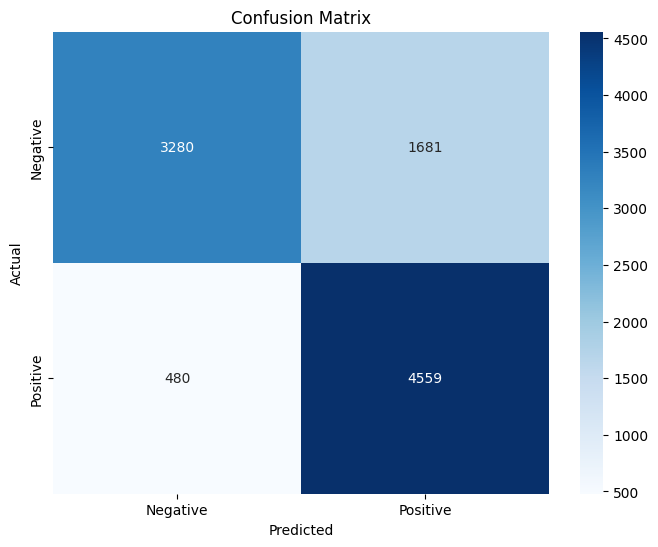

In [ ]:
# Bag of Word
y_pred = xgb_classifier_bow.predict(X_test_shift_bow)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7307
Precision: 0.6741
Recall: 0.9014
F1 Score: 0.7713

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.56      0.67      4961
           1       0.67      0.90      0.77      5039

    accuracy                           0.73     10000
   macro avg       0.76      0.73      0.72     10000
weighted avg       0.76      0.73      0.72     10000



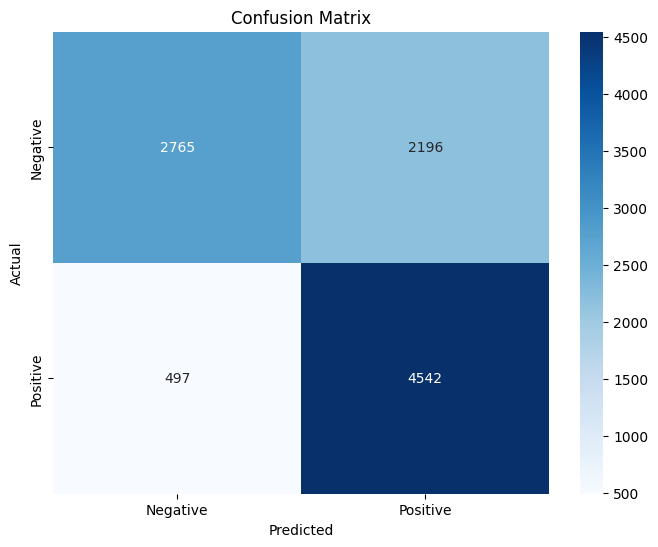

In [ ]:
# Bag of Word (Logistic Regression)
y_pred = model_bow.predict(X_test_shift_bow)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.6969
Precision: 0.8159
Recall: 0.5146
F1 Score: 0.6311

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.88      0.74      4961
           1       0.82      0.51      0.63      5039

    accuracy                           0.70     10000
   macro avg       0.73      0.70      0.69     10000
weighted avg       0.73      0.70      0.69     10000



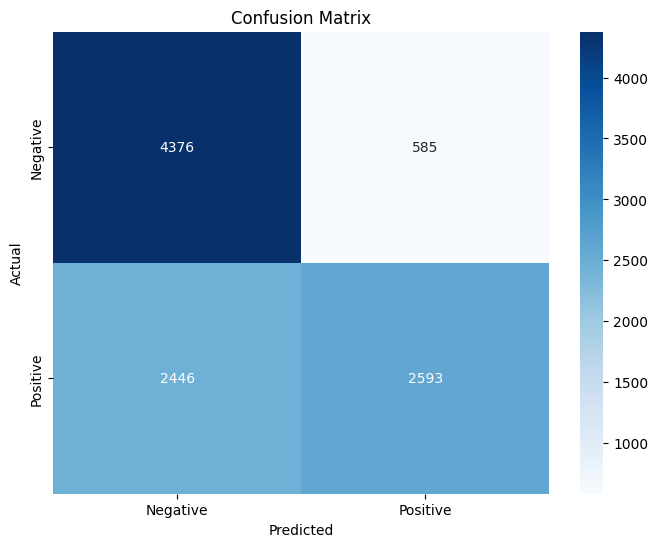

In [ ]:
# Word2Vec
y_pred = xgb_classifier_w2v.predict(X_test_shift_w2v)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title Test on Processed Data (without lemmatization)
def preprocess_text_shift(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove square brackets and texts in between
    text = re.sub(r'\[[^]]*\]', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenization
    words = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Join the words back into a string
    text = ' '.join(words)

    return text


df_shift = pd.read_csv('/content/drive/My Drive/CIS519/519_Project/imdb_dataset.csv')

# One_hot_encoded for sentitment label
class_to_num_mapping = {'positive': 1, 'negative': 0}
df_shift['sentiment'] = df_shift['sentiment'].replace(class_to_num_mapping)

# Apply on the data
df_shift['review'] = df_shift['review'].apply(preprocess_text_shift)

# Split the data into training and testing sets
X_train_shift, X_test_shift, y_train_shift, y_test_shift = train_test_split(df_shift['review'], df_shift['sentiment'], test_size=0.2, random_state=seed)


# TF-IDF Vectorization
X_test_shift_tfidf = vectorizer_tfidf.transform(X_test_shift)

# Bag of Words
X_test_shift_bow = cv_bow.transform(X_test_shift)

# Word2Vec
X_test_shift_w2v = np.array([vectorize(sentence) for sentence in X_test_shift])

Accuracy: 0.7840
Precision: 0.7375
Recall: 0.8871
F1 Score: 0.8054

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      4961
           1       0.74      0.89      0.81      5039

    accuracy                           0.78     10000
   macro avg       0.80      0.78      0.78     10000
weighted avg       0.80      0.78      0.78     10000



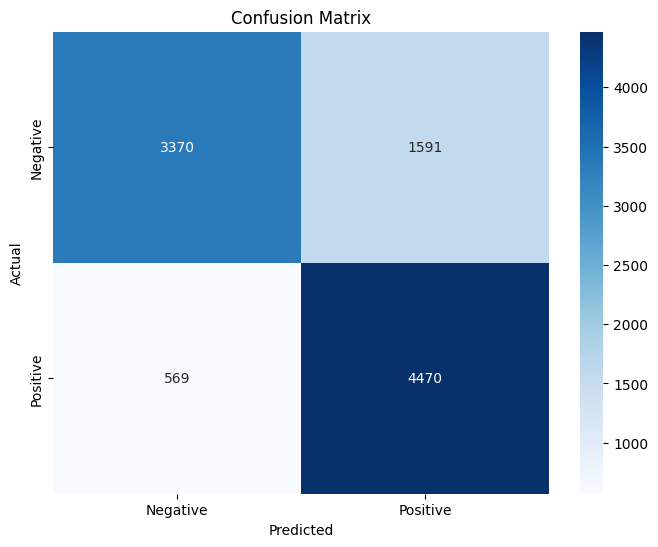

In [ ]:
# TFIDF
y_pred = xgb_classifier_tfidf.predict(X_test_shift_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8396
Precision: 0.8192
Recall: 0.8748
F1 Score: 0.8461

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      4961
           1       0.82      0.87      0.85      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



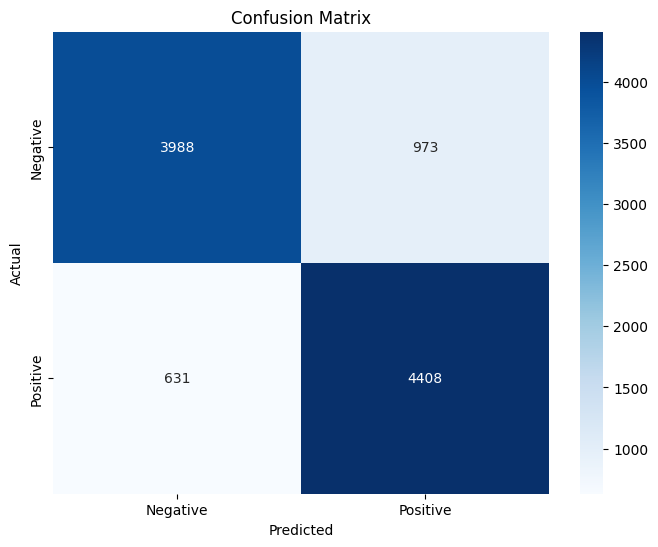

In [ ]:
# TFIDF (Logistic Regression)
y_pred = model_tfidf.predict(X_test_shift_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7898
Precision: 0.7480
Recall: 0.8789
F1 Score: 0.8082

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.70      0.77      4961
           1       0.75      0.88      0.81      5039

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



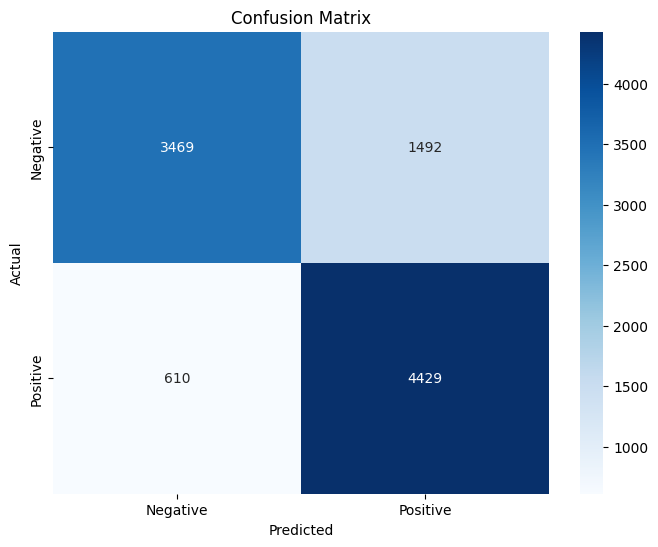

In [ ]:
# TFIDF (Tuned XGBoost)
y_pred = xgb_classifier_tfidf_tuned.predict(X_test_shift_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7879
Precision: 0.7377
Recall: 0.8986
F1 Score: 0.8102

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.68      0.76      4961
           1       0.74      0.90      0.81      5039

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.78     10000
weighted avg       0.80      0.79      0.79     10000



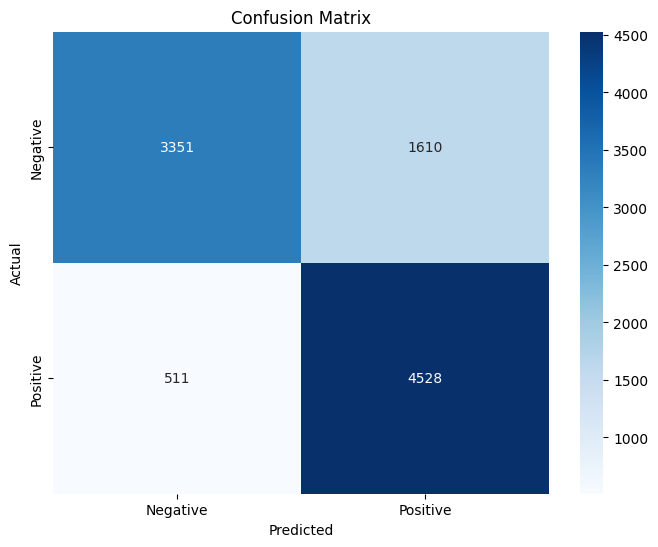

In [ ]:
# Bag of Word
y_pred = xgb_classifier_bow.predict(X_test_shift_bow)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8126
Precision: 0.7954
Recall: 0.8456
F1 Score: 0.8197

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      4961
           1       0.80      0.85      0.82      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



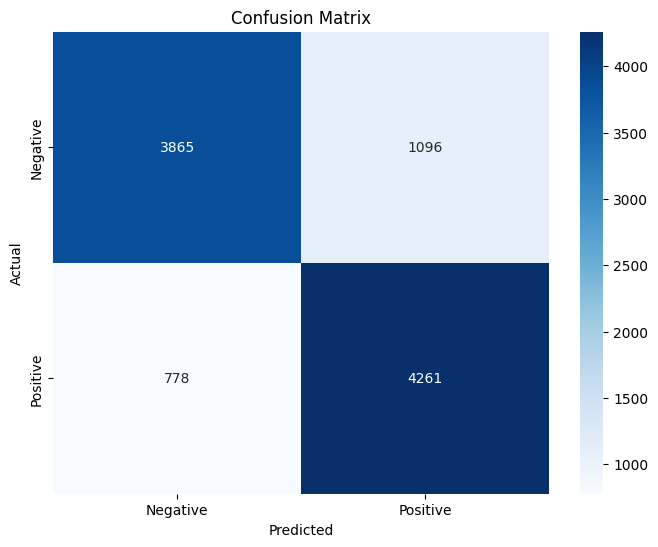

In [ ]:
# Bag of Word (Logistic Regression)
y_pred = model_bow.predict(X_test_shift_bow)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7889
Precision: 0.7687
Recall: 0.8311
F1 Score: 0.7987

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      4961
           1       0.77      0.83      0.80      5039

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



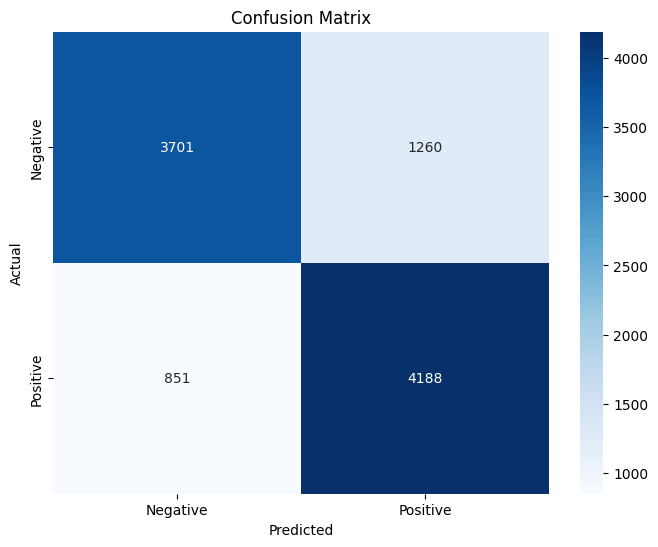

In [ ]:
# Word2Vec
y_pred = xgb_classifier_w2v.predict(X_test_shift_w2v)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title Test on Processed Data (without stop words removed)
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove square brackets and texts in between
    text = re.sub(r'\[[^]]*\]', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenization
    words = word_tokenize(text)

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Join the words back into a string
    text = ' '.join(words)

    return text

df_shift = pd.read_csv('/content/drive/My Drive/CIS519/519_Project/imdb_dataset.csv')

# One_hot_encoded for sentitment label
class_to_num_mapping = {'positive': 1, 'negative': 0}
df_shift['sentiment'] = df_shift['sentiment'].replace(class_to_num_mapping)

# Apply on the data
df_shift['review'] = df_shift['review'].apply(preprocess_text_shift)

# Split the data into training and testing sets
X_train_shift, X_test_shift, y_train_shift, y_test_shift = train_test_split(df_shift['review'], df_shift['sentiment'], test_size=0.2, random_state=seed)


# TF-IDF Vectorization
X_test_shift_tfidf = vectorizer_tfidf.transform(X_test_shift)

# Bag of Words
X_test_shift_bow = cv_bow.transform(X_test_shift)

# Word2Vec
X_test_shift_w2v = np.array([vectorize(sentence) for sentence in X_test_shift])

Accuracy: 0.7840
Precision: 0.7375
Recall: 0.8871
F1 Score: 0.8054

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      4961
           1       0.74      0.89      0.81      5039

    accuracy                           0.78     10000
   macro avg       0.80      0.78      0.78     10000
weighted avg       0.80      0.78      0.78     10000



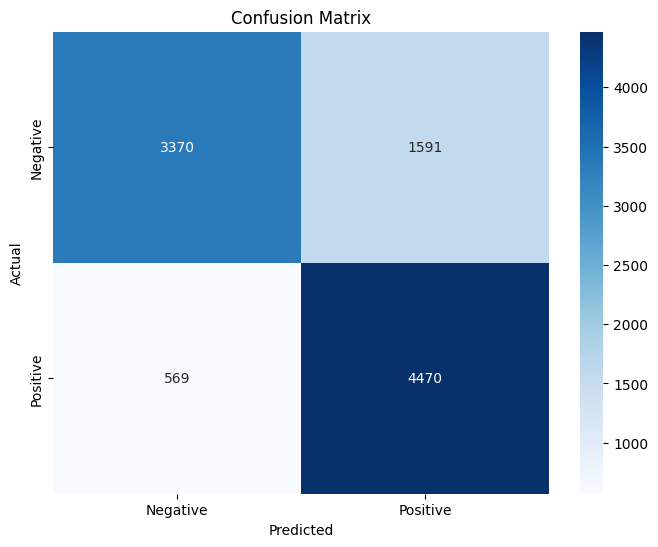

In [ ]:
# TFIDF
y_pred = xgb_classifier_tfidf.predict(X_test_shift_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8396
Precision: 0.8192
Recall: 0.8748
F1 Score: 0.8461

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      4961
           1       0.82      0.87      0.85      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



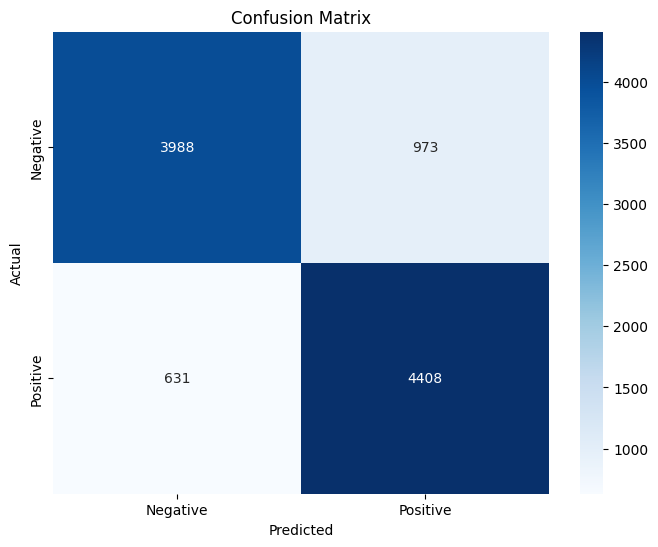

In [ ]:
# TFIDF (Logistic Regression)
y_pred = model_tfidf.predict(X_test_shift_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7898
Precision: 0.7480
Recall: 0.8789
F1 Score: 0.8082

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.70      0.77      4961
           1       0.75      0.88      0.81      5039

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



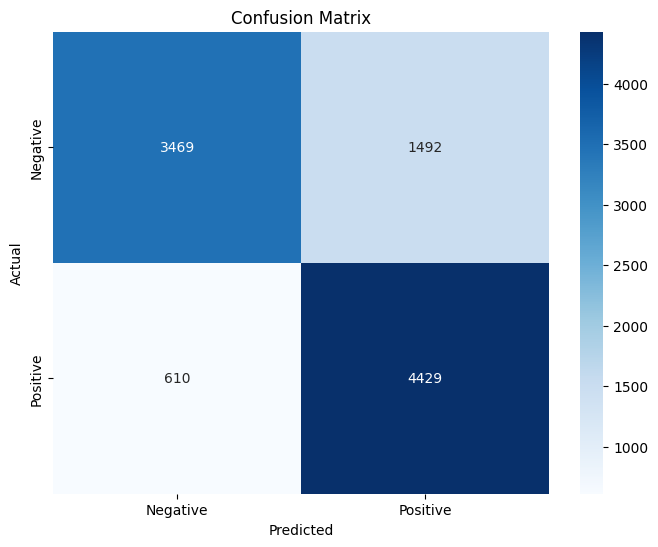

In [ ]:
# TFIDF (Tuned XGBoost)
y_pred = xgb_classifier_tfidf_tuned.predict(X_test_shift_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7879
Precision: 0.7377
Recall: 0.8986
F1 Score: 0.8102

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.68      0.76      4961
           1       0.74      0.90      0.81      5039

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.78     10000
weighted avg       0.80      0.79      0.79     10000



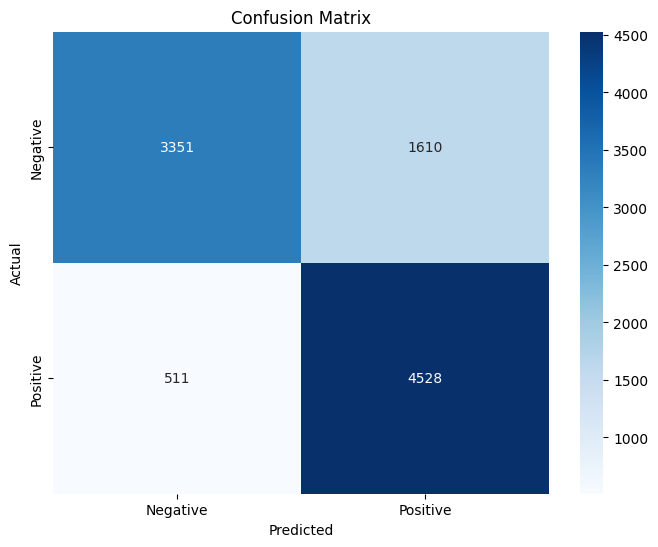

In [ ]:
# Bag of Word
y_pred = xgb_classifier_bow.predict(X_test_shift_bow)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8126
Precision: 0.7954
Recall: 0.8456
F1 Score: 0.8197

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      4961
           1       0.80      0.85      0.82      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



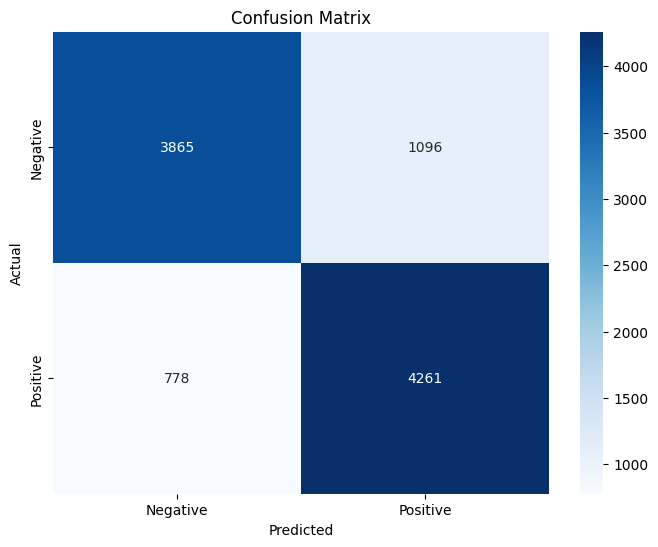

In [ ]:
# Bag of Word (Logistic Regression)
y_pred = model_bow.predict(X_test_shift_bow)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7889
Precision: 0.7687
Recall: 0.8311
F1 Score: 0.7987

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      4961
           1       0.77      0.83      0.80      5039

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



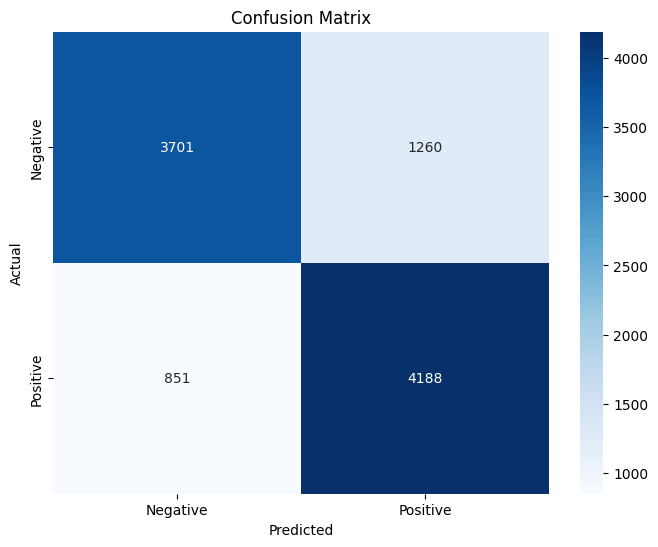

In [ ]:
# Word2Vec
y_pred = xgb_classifier_w2v.predict(X_test_shift_w2v)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title Test on Processed Data (without stop words removed and lemmatization)
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove square brackets and texts in between
    text = re.sub(r'\[[^]]*\]', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    return text

df_shift = pd.read_csv('/content/drive/My Drive/CIS519/519_Project/imdb_dataset.csv')

# One_hot_encoded for sentitment label
class_to_num_mapping = {'positive': 1, 'negative': 0}
df_shift['sentiment'] = df_shift['sentiment'].replace(class_to_num_mapping)

# Apply on the data
df_shift['review'] = df_shift['review'].apply(preprocess_text_shift)

# Split the data into training and testing sets
X_train_shift, X_test_shift, y_train_shift, y_test_shift = train_test_split(df_shift['review'], df_shift['sentiment'], test_size=0.2, random_state=seed)


# TF-IDF Vectorization
X_test_shift_tfidf = vectorizer_tfidf.transform(X_test_shift)

# Bag of Words
X_test_shift_bow = cv_bow.transform(X_test_shift)

# Word2Vec
X_test_shift_w2v = np.array([vectorize(sentence) for sentence in X_test_shift])

Accuracy: 0.7840
Precision: 0.7375
Recall: 0.8871
F1 Score: 0.8054

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      4961
           1       0.74      0.89      0.81      5039

    accuracy                           0.78     10000
   macro avg       0.80      0.78      0.78     10000
weighted avg       0.80      0.78      0.78     10000



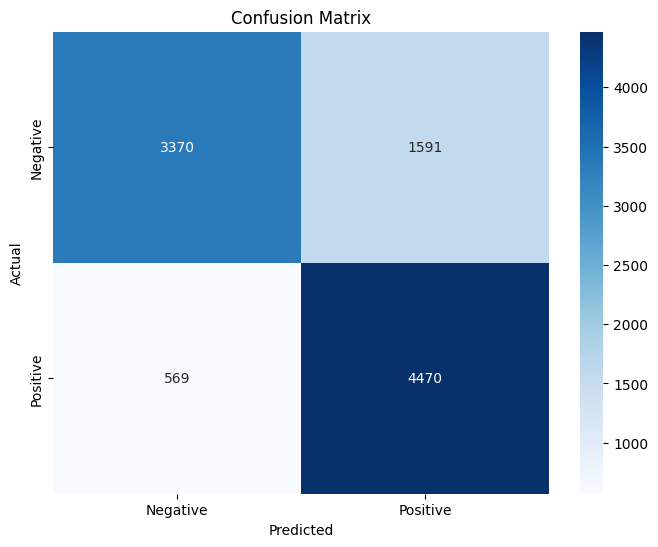

In [ ]:
# TFIDF
y_pred = xgb_classifier_tfidf.predict(X_test_shift_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8396
Precision: 0.8192
Recall: 0.8748
F1 Score: 0.8461

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      4961
           1       0.82      0.87      0.85      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



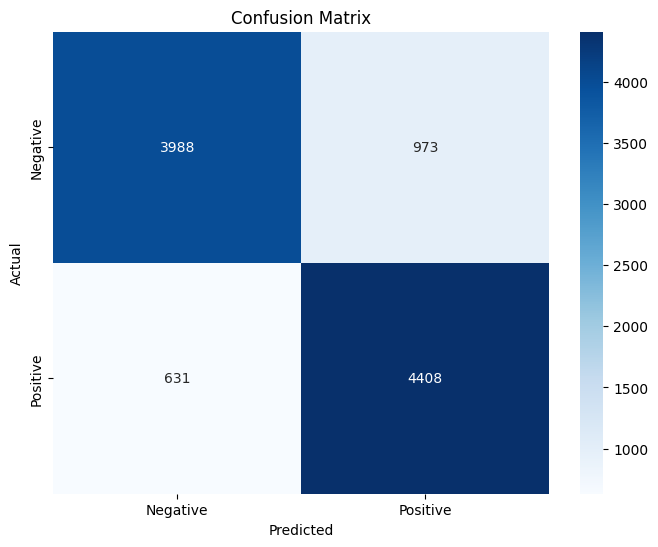

In [ ]:
# TFIDF (Logistic Regression)
y_pred = model_tfidf.predict(X_test_shift_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7898
Precision: 0.7480
Recall: 0.8789
F1 Score: 0.8082

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.70      0.77      4961
           1       0.75      0.88      0.81      5039

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



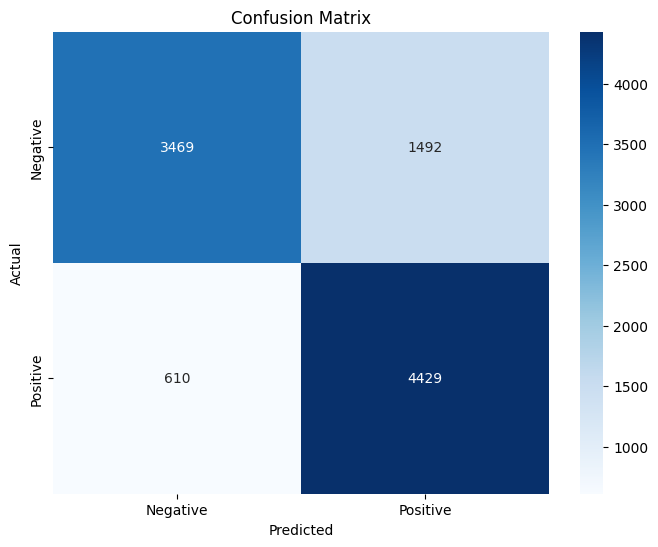

In [ ]:
# TFIDF (Tuned XGBoost)
y_pred = xgb_classifier_tfidf_tuned.predict(X_test_shift_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7879
Precision: 0.7377
Recall: 0.8986
F1 Score: 0.8102

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.68      0.76      4961
           1       0.74      0.90      0.81      5039

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.78     10000
weighted avg       0.80      0.79      0.79     10000



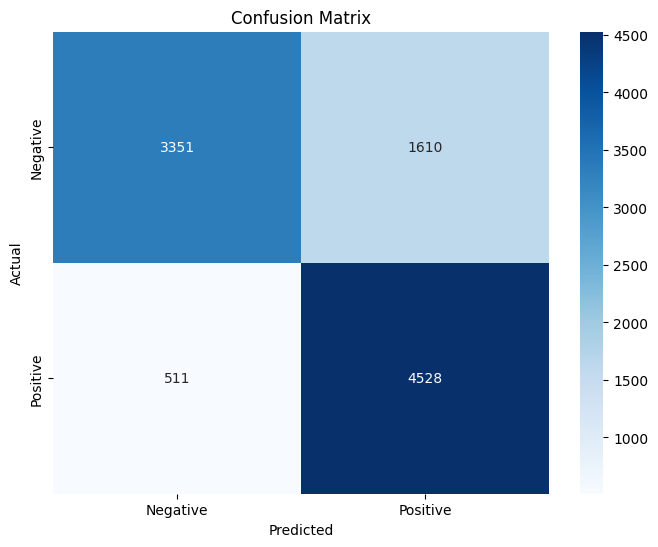

In [ ]:
# Bag of Word
y_pred = xgb_classifier_bow.predict(X_test_shift_bow)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8126
Precision: 0.7954
Recall: 0.8456
F1 Score: 0.8197

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      4961
           1       0.80      0.85      0.82      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



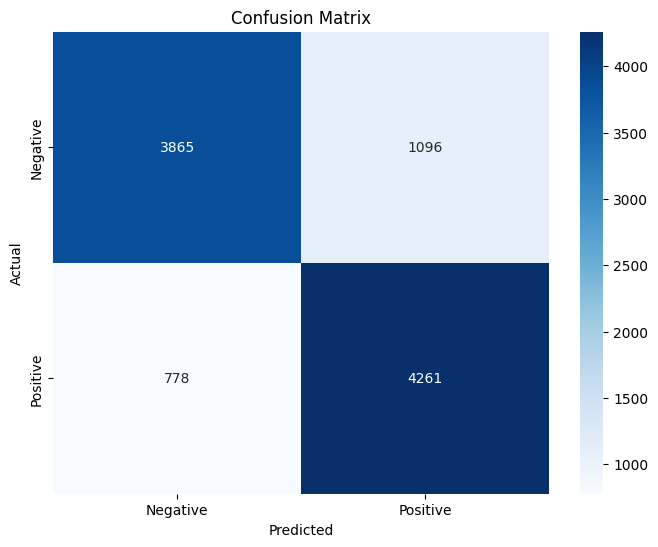

In [ ]:
# Bag of Word (Logistic Regression)
y_pred = model_bow.predict(X_test_shift_bow)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7889
Precision: 0.7687
Recall: 0.8311
F1 Score: 0.7987

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      4961
           1       0.77      0.83      0.80      5039

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



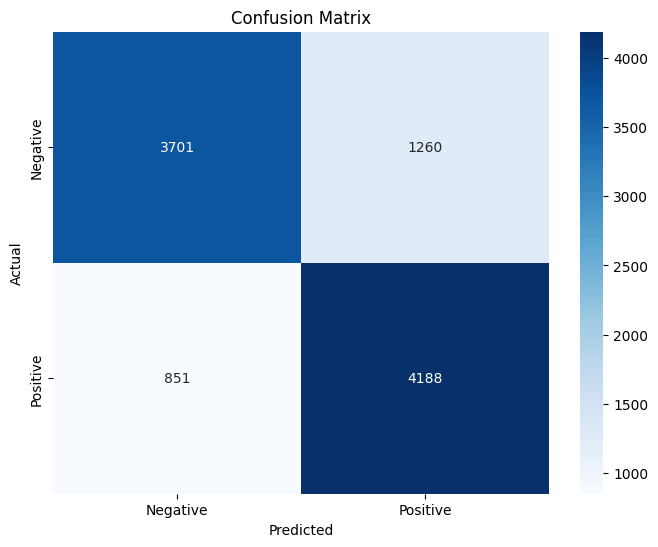

In [ ]:
# Word2Vec
y_pred = xgb_classifier_w2v.predict(X_test_shift_w2v)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title Test on noisy data (adding random words)
def preprocess_text_shift(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove square brackets and texts in between
    text = re.sub(r'\[[^]]*\]', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenization
    words = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Adding random words
    for i in range(10):
        words.append(random.choice(words))

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Join the words back into a string
    text = ' '.join(words)

    return text


df_shift = pd.read_csv('/content/drive/My Drive/CIS519/519_Project/imdb_dataset.csv')

# One_hot_encoded for sentitment label
class_to_num_mapping = {'positive': 1, 'negative': 0}
df_shift['sentiment'] = df_shift['sentiment'].replace(class_to_num_mapping)

# Apply on the data
df_shift['review'] = df_shift['review'].apply(preprocess_text_shift)

# Split the data into training and testing sets
X_train_shift, X_test_shift, y_train_shift, y_test_shift = train_test_split(df_shift['review'], df_shift['sentiment'], test_size=0.2, random_state=seed)


# TF-IDF Vectorization
X_test_shift_tfidf = vectorizer_tfidf.transform(X_test_shift)

# Bag of Words
X_test_shift_bow = cv_bow.transform(X_test_shift)

# Word2Vec
X_test_shift_w2v = np.array([vectorize(sentence) for sentence in X_test_shift])

Accuracy: 0.8581
Precision: 0.8465
Recall: 0.8776
F1 Score: 0.8617

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4961
           1       0.85      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



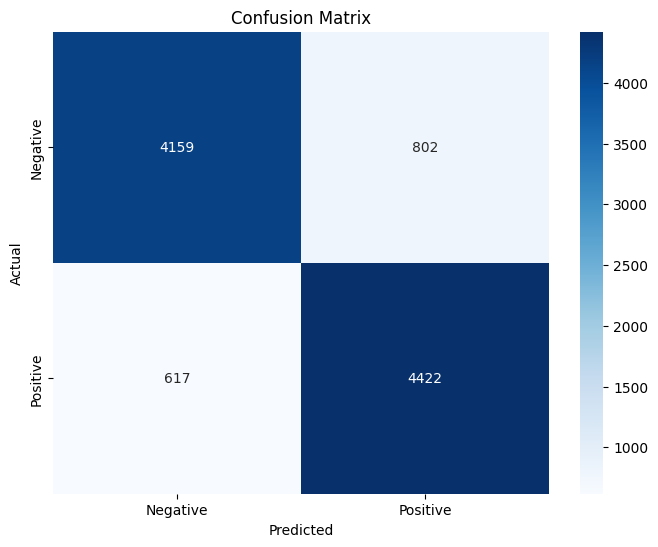

In [ ]:
# TFIDF
y_pred = xgb_classifier_tfidf.predict(X_test_shift_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8841
Precision: 0.8748
Recall: 0.8986
F1 Score: 0.8865

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



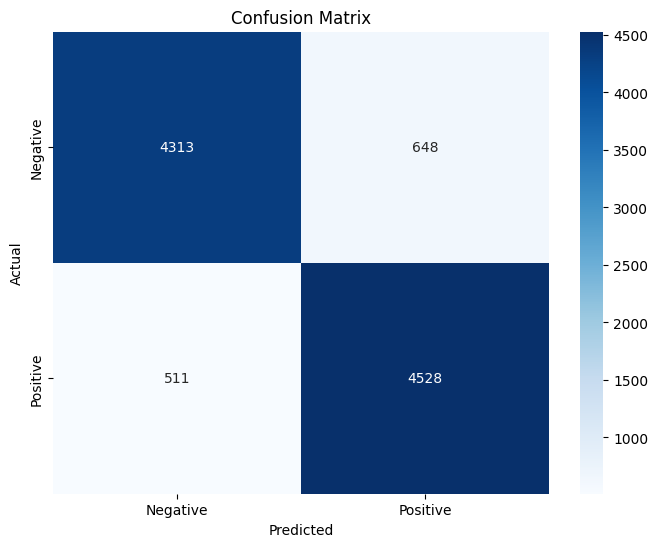

In [ ]:
# TFIDF (Logistic Regression)
y_pred = model_tfidf.predict(X_test_shift_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8628
Precision: 0.8528
Recall: 0.8795
F1 Score: 0.8660

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4961
           1       0.85      0.88      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



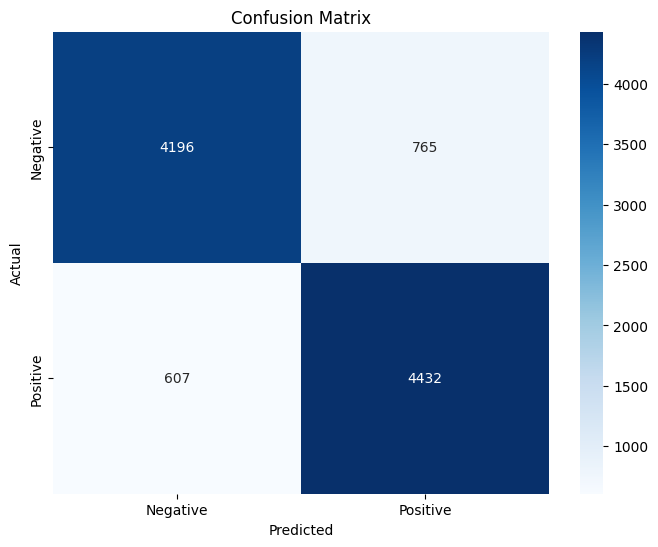

In [ ]:
# TFIDF (Tuned XGBoost)
y_pred = xgb_classifier_tfidf_tuned.predict(X_test_shift_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8576
Precision: 0.8420
Recall: 0.8831
F1 Score: 0.8621

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      4961
           1       0.84      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



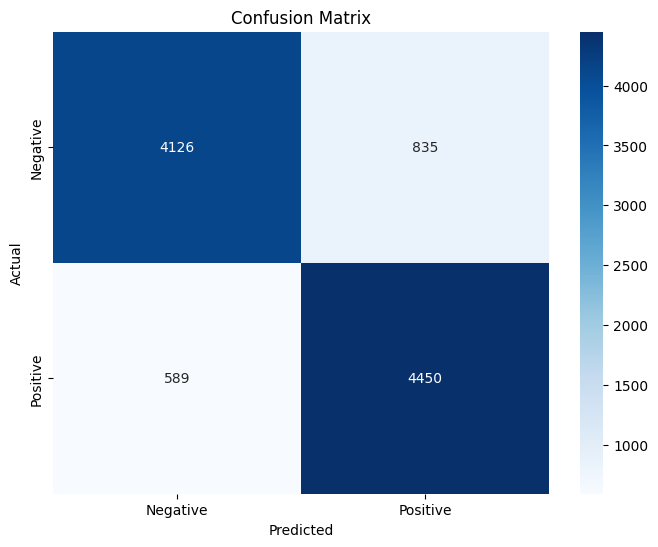

In [ ]:
# Bag of Word
y_pred = xgb_classifier_bow.predict(X_test_shift_bow)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8763
Precision: 0.8722
Recall: 0.8841
F1 Score: 0.8781

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4961
           1       0.87      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



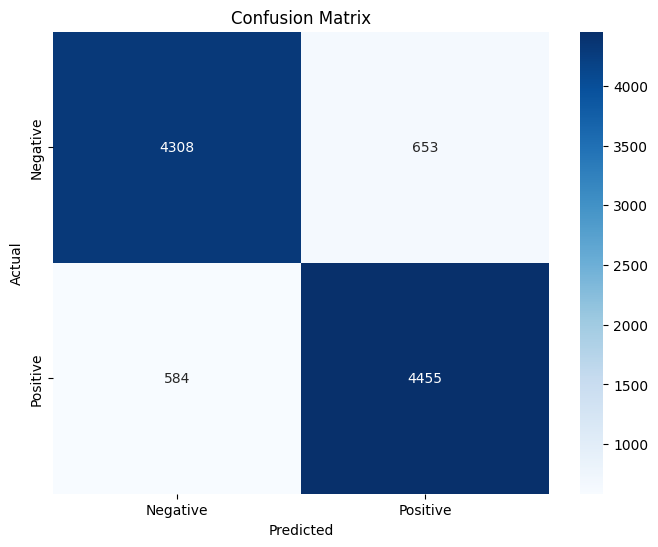

In [ ]:
# Bag of Word (Logistic Regression)
y_pred = model_bow.predict(X_test_shift_bow)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8373
Precision: 0.8356
Recall: 0.8430
F1 Score: 0.8393

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      4961
           1       0.84      0.84      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



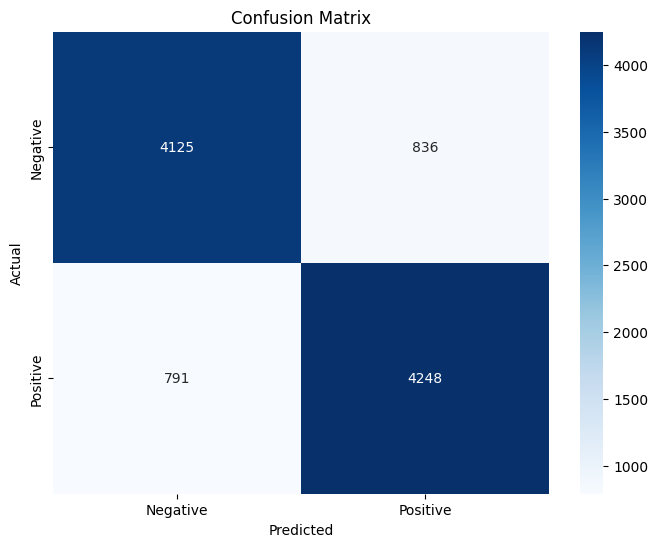

In [ ]:
# Word2Vec
y_pred = xgb_classifier_w2v.predict(X_test_shift_w2v)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title Test on similar review (replace synonyms)
from nltk.corpus import wordnet

def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())
    return synonyms

def preprocess_text_shift(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove square brackets and texts in between
    text = re.sub(r'\[[^]]*\]', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenization
    words = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Replace some words with synonyms
    for i in range(15):
        word = random.choice(words)
        synonyms = get_synonyms(word)
        if len(synonyms) > 0:
            words[words.index(word)] = random.choice(synonyms)

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Join the words back into a string
    text = ' '.join(words)

    return text


df_shift = pd.read_csv('/content/drive/My Drive/CIS519/519_Project/imdb_dataset.csv')

# One_hot_encoded for sentitment label
class_to_num_mapping = {'positive': 1, 'negative': 0}
df_shift['sentiment'] = df_shift['sentiment'].replace(class_to_num_mapping)

# Apply on the data
df_shift['review'] = df_shift['review'].apply(preprocess_text_shift)

# Split the data into training and testing sets
X_train_shift, X_test_shift, y_train_shift, y_test_shift = train_test_split(df_shift['review'], df_shift['sentiment'], test_size=0.2, random_state=seed)


# TF-IDF Vectorization
X_test_shift_tfidf = vectorizer_tfidf.transform(X_test_shift)

# Bag of Words
X_test_shift_bow = cv_bow.transform(X_test_shift)

# Word2Vec
X_test_shift_w2v = np.array([vectorize(sentence) for sentence in X_test_shift])

Accuracy: 0.8517
Precision: 0.8378
Recall: 0.8752
F1 Score: 0.8561

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4961
           1       0.84      0.88      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



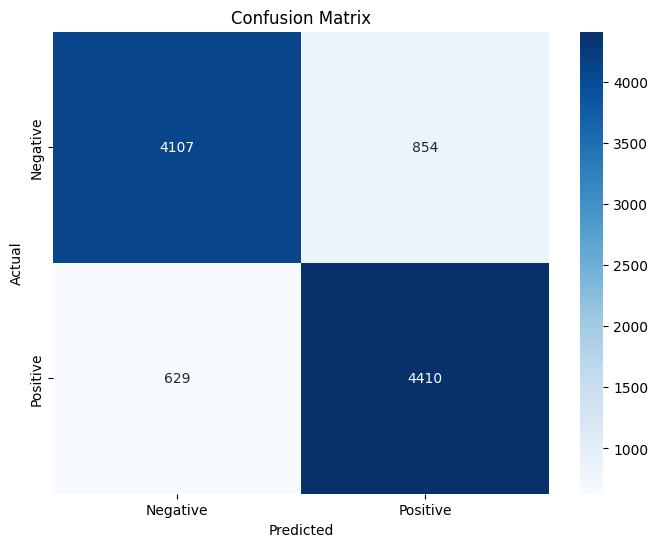

In [ ]:
# TFIDF
y_pred = xgb_classifier_tfidf.predict(X_test_shift_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8851
Precision: 0.8765
Recall: 0.8986
F1 Score: 0.8874

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.88      0.89     10000
weighted avg       0.89      0.89      0.89     10000



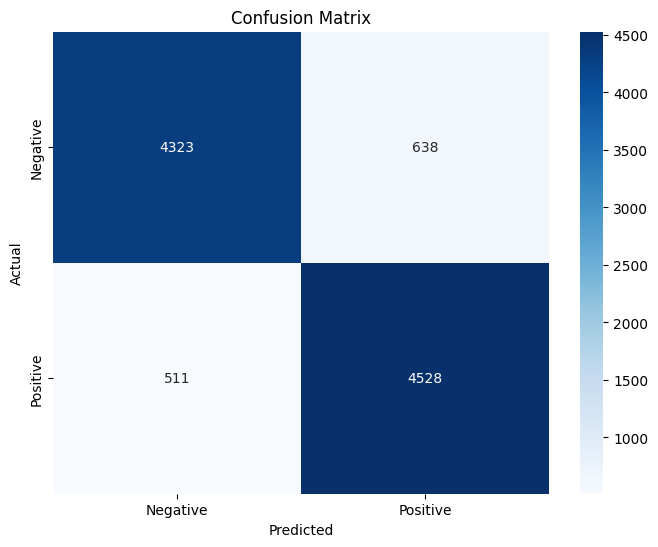

In [ ]:
# TFIDF (Logistic Regression)
y_pred = model_tfidf.predict(X_test_shift_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8539
Precision: 0.8448
Recall: 0.8698
F1 Score: 0.8571

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4961
           1       0.84      0.87      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



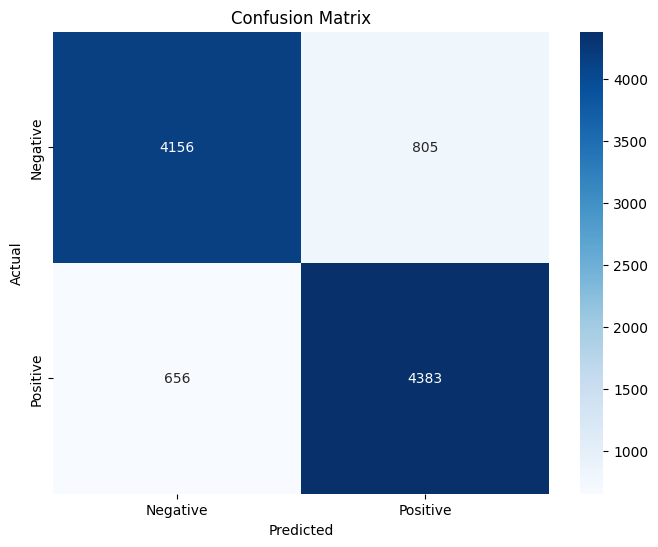

In [ ]:
# TFIDF (Tuned XGBoost)
y_pred = xgb_classifier_tfidf_tuned.predict(X_test_shift_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8499
Precision: 0.8339
Recall: 0.8768
F1 Score: 0.8548

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4961
           1       0.83      0.88      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



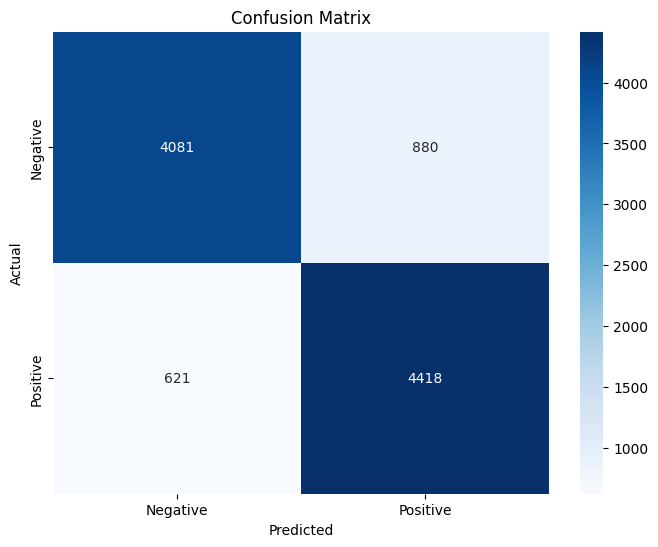

In [ ]:
# Bag of Word
y_pred = xgb_classifier_bow.predict(X_test_shift_bow)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8727
Precision: 0.8714
Recall: 0.8768
F1 Score: 0.8741

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4961
           1       0.87      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



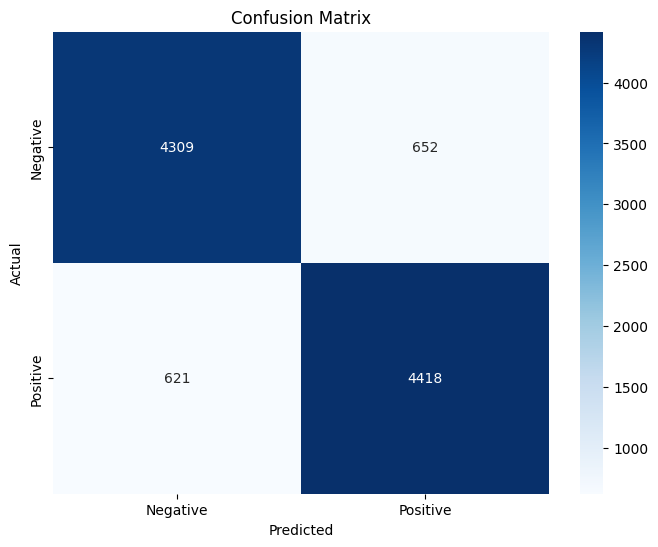

In [ ]:
# Bag of Word (Logistic Regression)
y_pred = model_bow.predict(X_test_shift_bow)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8382
Precision: 0.8408
Recall: 0.8375
F1 Score: 0.8391

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4961
           1       0.84      0.84      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



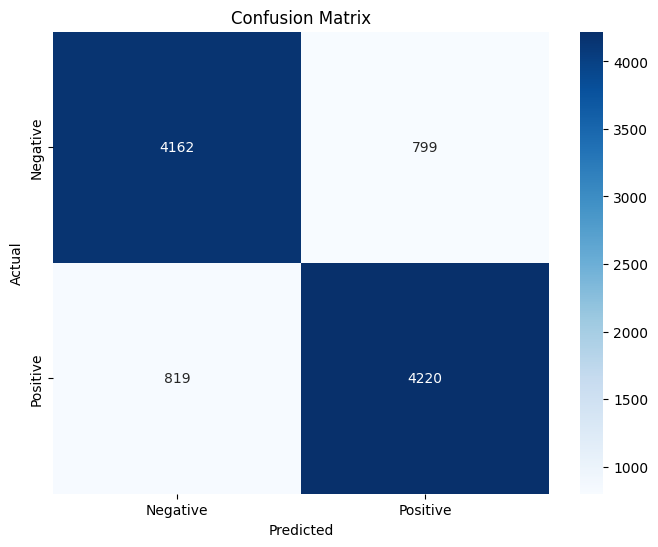

In [ ]:
# Word2Vec
y_pred = xgb_classifier_w2v.predict(X_test_shift_w2v)

# Calculate metrics
accuracy = accuracy_score(y_test_shift, y_pred)
precision = precision_score(y_test_shift, y_pred)
recall = recall_score(y_test_shift, y_pred)
f1 = f1_score(y_test_shift, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_shift, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_shift, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Modeling (Deep Learning Pipeline)

---
We will use LSTM/BiLSTM architecture as our deep learning pipeline.

In [ ]:
#@title Glove Embeddings
!wget -nc https://nlp.stanford.edu/data/glove.840B.300d.zip
!unzip glove.840B.300d.zip
!ls -lat

--2023-12-06 23:52:50--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2023-12-06 23:52:50--  https://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip]
Saving to: ‘glove.840B.300d.zip’

glove.840B.300d.zip 100%[===================>]   2.03G  4.98MB/s    in 6m 50s  

2023-12-06 23:59:41 (5.06 MB/s) - ‘glove.840B.300d.zip’ saved [2176768927/2176768927]

Archive:  glove.840B.300d.zip
  inflating: glove.840B.300d.txt     
tot

In [ ]:
glove_file = "glove.840B.300d.txt"
!head -n 10 $glove_file

, -0.082752 0.67204 -0.14987 -0.064983 0.056491 0.40228 0.0027747 -0.3311 -0.30691 2.0817 0.031819 0.013643 0.30265 0.0071297 -0.5819 -0.2774 -0.062254 1.1451 -0.24232 0.1235 -0.12243 0.33152 -0.006162 -0.30541 -0.13057 -0.054601 0.037083 -0.070552 0.5893 -0.30385 0.2898 -0.14653 -0.27052 0.37161 0.32031 -0.29125 0.0052483 -0.13212 -0.052736 0.087349 -0.26668 -0.16897 0.015162 -0.0083746 -0.14871 0.23413 -0.20719 -0.091386 0.40075 -0.17223 0.18145 0.37586 -0.28682 0.37289 -0.16185 0.18008 0.3032 -0.13216 0.18352 0.095759 0.094916 0.008289 0.11761 0.34046 0.03677 -0.29077 0.058303 -0.027814 0.082941 0.1862 -0.031494 0.27985 -0.074412 -0.13762 -0.21866 0.18138 0.040855 -0.113 0.24107 0.3657 -0.27525 -0.05684 0.34872 0.011884 0.14517 -0.71395 0.48497 0.14807 0.62287 0.20599 0.58379 -0.13438 0.40207 0.18311 0.28021 -0.42349 -0.25626 0.17715 -0.54095 0.16596 -0.036058 0.08499 -0.64989 0.075549 -0.28831 0.40626 -0.2802 0.094062 0.32406 0.28437 -0.26341 0.11553 0.071918 -0.47215 -0.18366 -0.3

In [ ]:
# load the GloVe embeddings
def load_glove_embeddings(glove_file):
    embeddings = {}
    with open(glove_file, 'r', encoding='utf8') as f:
        for line in f:
            try:
                line = line.split()
                word = line[0]
                embedding = np.array(line[1:], dtype=np.float32)
                embeddings[word] = embedding
            except:
                continue
    return embeddings

embeddings = load_glove_embeddings(glove_file)

In [ ]:
# Check the dimension of the embeddings
print('Number of words:', len(embeddings))
print('Embedding dimension:', len(embeddings['the']))

Number of words: 2195884
Embedding dimension: 300


In [ ]:
#@title Embedding Matrix
def get_embedding_matrix(embeddings, word_index, vocab_size):
    embedding_matrix = np.zeros((vocab_size, 300))
    for word, i in word_index.items():
        if word in embeddings:
            embedding_matrix[i] = embeddings[word]

    embedding_matrix = torch.tensor(embedding_matrix, dtype=torch.float32)
    return embedding_matrix


In [ ]:
#@title IMDBDataset (torch)
class IMDBDataset:
    def __init__(self, reviews, sentiment):
        self.reviews = reviews
        self.sentiment = sentiment

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        review = torch.tensor(self.reviews[idx,:], dtype = torch.long)
        sentiment = torch.tensor(self.sentiment[idx], dtype = torch.float)

        return {'review': review, 'sentiment': sentiment}

In [ ]:
#@title Initialize the Dataloader for training & validation
train_batch_size = 16
val_batch_size = 8

# Tokenize the reviews
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train.values.tolist())
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

# Convert the reviews to sequences
X = tokenizer.texts_to_sequences(X_train.values)

# Pad the sequences
X = pad_sequences(X, maxlen=128)

# Create the dataset object
dataset = IMDBDataset(X, y_train.values)

# Create the training and validation splits
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create the training and validation data loaders
train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=val_batch_size)

# LSTM on GloVe Embeddings

In [ ]:
class LSTM(nn.Module):
    def __init__(self, embedding_matrix):
        super(LSTM, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=embedding_matrix.shape[0], embedding_dim=embedding_matrix.shape[1])
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype = torch.float32))
        self.embedding.weight.requires_grad = False

        self.lstm = nn.LSTM(embedding_matrix.shape[1], 128, batch_first=True, bidirectional=False)
        self.linear = nn.Linear(256, 1)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        avg_pool = torch.mean(x, 1)
        max_pool, _ = torch.max(x, 1)
        out = torch.cat((avg_pool, max_pool), 1)
        out = self.linear(out)
        return out

In [ ]:
#@title Training
criterion = nn.BCEWithLogitsLoss()

def train(data_loader, model, optimizer, device):
    model.train()
    for data in data_loader:
        reviews = data['review'].to(device)
        sentiment = data['sentiment'].to(device)
        optimizer.zero_grad()
        predictions = model(reviews)
        loss = criterion(predictions, sentiment.unsqueeze(1))
        loss.backward()
        optimizer.step()

def evaluate(data_loader, model, device):
    model.eval()
    final_predictions = []
    final_sentiment = []
    with torch.no_grad():
        for data in data_loader:
            reviews = data['review'].to(device, dtype=torch.long)
            sentiment = data['sentiment'].to(device, dtype=torch.float)
            predictions = model(reviews)
            predictions = predictions.cpu().numpy().tolist()
            sentiment = data['sentiment'].cpu().numpy().tolist()
            final_predictions.extend(predictions)
            final_sentiment.extend(sentiment)
    return final_predictions, final_sentiment



# Define the hyperparameters
learning_rate = 0.001
num_epochs = 20

# Create the model instance
model = LSTM(get_embedding_matrix(embeddings, word_index, vocab_size))

# Move the model to the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

# Create the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Initialize early stopping variables
best_val_accuracy = 0.0
current_patience = 0
patience = 3
threshold = 0.87

# Start the training loop with early stopping
for epoch in range(num_epochs):
    train(train_loader, model, optimizer, device)
    predictions, sentiment = evaluate(val_loader, model, device)
    predictions = np.array(predictions) >= 0.5
    accuracy = accuracy_score(sentiment, predictions)
    precision = precision_score(sentiment, predictions)
    recall = recall_score(sentiment, predictions)
    f1 = f1_score(sentiment, predictions)
    print(f"Epoch: {epoch+1} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f}")

    # Check for improvement in validation F1 score
    if accuracy > best_val_accuracy:
        best_val_accuracy = accuracy
        current_patience = 0
    else:
        current_patience += 1
        if current_patience >= patience and accuracy >= threshold:
            print(f"Early stopping at epoch {epoch + 1}. No improvement in validation accuracy score.")
            break

cuda
Epoch: 1 | Accuracy: 0.8555 | Precision: 0.8467 | Recall: 0.8658 | F1 Score: 0.8561
Epoch: 2 | Accuracy: 0.8741 | Precision: 0.8805 | Recall: 0.8638 | F1 Score: 0.8721
Epoch: 3 | Accuracy: 0.8759 | Precision: 0.8990 | Recall: 0.8450 | F1 Score: 0.8712
Epoch: 4 | Accuracy: 0.8794 | Precision: 0.8962 | Recall: 0.8563 | F1 Score: 0.8758
Epoch: 5 | Accuracy: 0.8772 | Precision: 0.8640 | Recall: 0.8935 | F1 Score: 0.8785
Epoch: 6 | Accuracy: 0.8728 | Precision: 0.8747 | Recall: 0.8681 | F1 Score: 0.8714
Epoch: 7 | Accuracy: 0.8676 | Precision: 0.8979 | Recall: 0.8276 | F1 Score: 0.8613
Early stopping at epoch 7. No improvement in validation accuracy score.


Accuracy: 0.8679
Precision: 0.9000
Recall: 0.8301
F1 Score: 0.8636

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      4961
         1.0       0.90      0.83      0.86      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



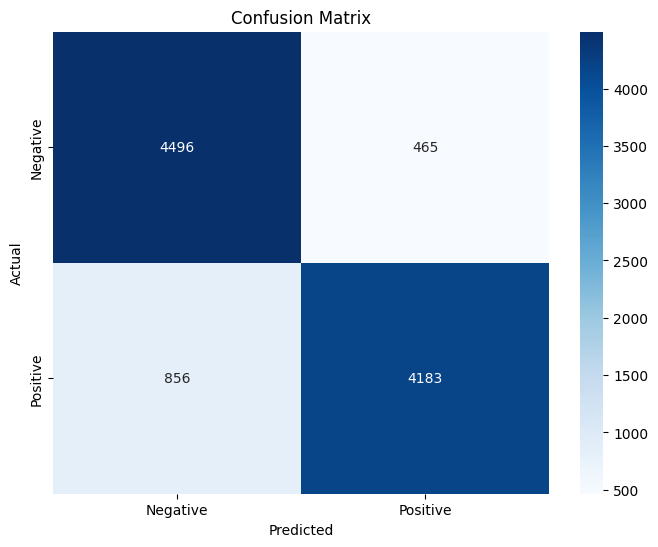

In [ ]:
#@title Testing for Trained LSTM
# Create the test dataset and data loader
X_test_glove = tokenizer.texts_to_sequences(X_test.values)
X_test_glove = pad_sequences(X_test_glove, maxlen=128)
test_dataset = IMDBDataset(X_test_glove, y_test.values)
test_loader = DataLoader(test_dataset, batch_size=8)

# Make predictions on the test set
predictions, sentiment = evaluate(test_loader, model, device)
predictions = np.array(predictions) >= 0.5

# Calculate metrics
accuracy = accuracy_score(sentiment, predictions)
precision = precision_score(sentiment, predictions)
recall = recall_score(sentiment, predictions)
f1 = f1_score(sentiment, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(sentiment, predictions))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(sentiment, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# BiLSTM on GloVe Embeddings

In [ ]:
class LSTM(nn.Module):
    def __init__(self, embedding_matrix):
        super(LSTM, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=embedding_matrix.shape[0], embedding_dim=embedding_matrix.shape[1])
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype = torch.float32))
        self.embedding.weight.requires_grad = False

        self.lstm = nn.LSTM(embedding_matrix.shape[1], 128, batch_first=True, bidirectional=True)
        self.linear = nn.Linear(512, 1)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        avg_pool = torch.mean(x, 1)
        max_pool, _ = torch.max(x, 1)
        out = torch.cat((avg_pool, max_pool), 1)
        out = self.linear(out)
        return out

In [ ]:
#@title Training
# Define the hyperparameters
learning_rate = 0.001
num_epochs = 20

criterion = nn.BCEWithLogitsLoss()

def train(data_loader, model, optimizer, device):
    model.train()
    for data in data_loader:
        reviews = data['review'].to(device, dtype = torch.long)
        sentiment = data['sentiment'].to(device, dtype=torch.float)
        optimizer.zero_grad()
        predictions = model(reviews)
        loss = criterion(predictions, sentiment.unsqueeze(1))
        loss.backward()
        optimizer.step()

def evaluate(data_loader, model, device):
    model.eval()
    final_predictions = []
    final_sentiment = []
    with torch.no_grad():
        for data in data_loader:
            reviews = data['review'].to(device, dtype=torch.long)
            sentiment = data['sentiment'].to(device, dtype=torch.float)
            predictions = model(reviews)
            predictions = predictions.cpu().numpy().tolist()
            sentiment = data['sentiment'].cpu().numpy().tolist()
            final_predictions.extend(predictions)
            final_sentiment.extend(sentiment)
    return final_predictions, final_sentiment



# Create the model instance
model = LSTM(get_embedding_matrix(embeddings, word_index, vocab_size))

# Move the model to the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

# Create the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Initialize early stopping variables
best_val_accuracy = 0.0
current_patience = 0
patience = 3
threshold = 0.88

# Start the training loop with early stopping
for epoch in range(num_epochs):
    train(train_loader, model, optimizer, device)
    predictions, sentiment = evaluate(val_loader, model, device)
    predictions = np.array(predictions) >= 0.5
    accuracy = accuracy_score(sentiment, predictions)
    precision = precision_score(sentiment, predictions)
    recall = recall_score(sentiment, predictions)
    f1 = f1_score(sentiment, predictions)
    print(f"Epoch: {epoch+1} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f}")

    # Check for improvement in validation F1 score
    if accuracy > best_val_accuracy:
        best_val_accuracy = accuracy
        current_patience = 0
    else:
        current_patience += 1
        if current_patience >= patience and accuracy >= threshold:
            print(f"Early stopping at epoch {epoch + 1}. No improvement in validation accuracy score.")
            break

cuda
Epoch: 1 | Accuracy: 0.8355 | Precision: 0.9298 | Recall: 0.7234 | F1 Score: 0.8137
Epoch: 2 | Accuracy: 0.8789 | Precision: 0.8879 | Recall: 0.8653 | F1 Score: 0.8765
Epoch: 3 | Accuracy: 0.8782 | Precision: 0.9160 | Recall: 0.8311 | F1 Score: 0.8715
Epoch: 4 | Accuracy: 0.8774 | Precision: 0.9219 | Recall: 0.8228 | F1 Score: 0.8695
Epoch: 5 | Accuracy: 0.8852 | Precision: 0.8825 | Recall: 0.8870 | F1 Score: 0.8848
Epoch: 6 | Accuracy: 0.8810 | Precision: 0.9001 | Recall: 0.8553 | F1 Score: 0.8771
Epoch: 7 | Accuracy: 0.8806 | Precision: 0.8820 | Recall: 0.8769 | F1 Score: 0.8795
Epoch: 8 | Accuracy: 0.8771 | Precision: 0.8486 | Recall: 0.9159 | F1 Score: 0.8810
Epoch: 9 | Accuracy: 0.8760 | Precision: 0.8974 | Recall: 0.8472 | F1 Score: 0.8716
Epoch: 10 | Accuracy: 0.8819 | Precision: 0.8856 | Recall: 0.8752 | F1 Score: 0.8804
Early stopping at epoch 10. No improvement in validation accuracy score.


Accuracy: 0.8821
Precision: 0.8866
Recall: 0.8783
F1 Score: 0.8825

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      4961
         1.0       0.89      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



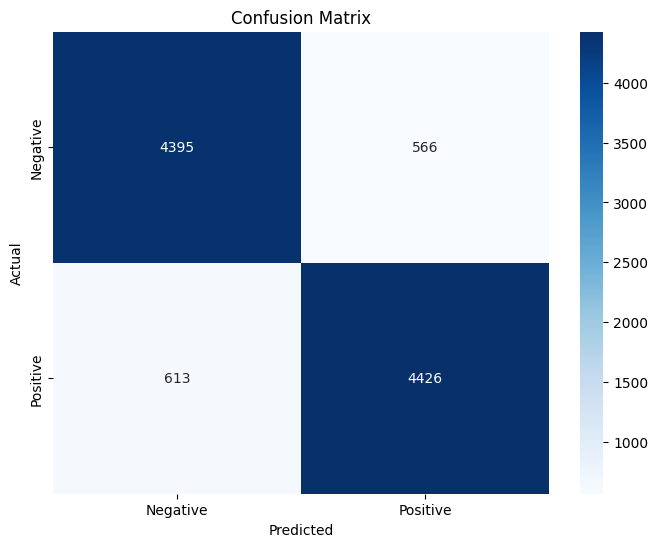

In [ ]:
#@title Testing for Trained BiLSTM
# Create the test dataset and data loader
X_test_glove = tokenizer.texts_to_sequences(X_test.values)
X_test_glove = pad_sequences(X_test_glove, maxlen=128)
test_dataset = IMDBDataset(X_test_glove, y_test.values)
test_loader = DataLoader(test_dataset, batch_size=16)

# Make predictions on the test set
predictions, sentiment = evaluate(test_loader, model, device)
predictions = np.array(predictions) >= 0.5

# Calculate metrics
accuracy = accuracy_score(sentiment, predictions)
precision = precision_score(sentiment, predictions)
recall = recall_score(sentiment, predictions)
f1 = f1_score(sentiment, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(sentiment, predictions))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(sentiment, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Vary Hyperparameter for BiLSTM

In [ ]:
#@title Learning Rate = 0.01
learning_rate = 0.01

# Create the model instance
model = LSTM(get_embedding_matrix(embeddings, word_index, vocab_size))

# Move the model to the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

# Create the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Initialize early stopping variables
best_val_accuracy = 0.0
current_patience = 0
patience = 3
# threshold = 0.88

# Start the training loop with early stopping
for epoch in range(num_epochs):
    train(train_loader, model, optimizer, device)
    predictions, sentiment = evaluate(val_loader, model, device)
    predictions = np.array(predictions) >= 0.5
    accuracy = accuracy_score(sentiment, predictions)
    precision = precision_score(sentiment, predictions)
    recall = recall_score(sentiment, predictions)
    f1 = f1_score(sentiment, predictions)
    print(f"Epoch: {epoch+1} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f}")

    # Check for improvement in validation F1 score
    if accuracy > best_val_accuracy:
        best_val_accuracy = accuracy
        current_patience = 0
    else:
        current_patience += 1
        if current_patience >= patience:
            print(f"Early stopping at epoch {epoch + 1}. No improvement in validation accuracy score.")
            break

cuda
Epoch: 1 | Accuracy: 0.8642 | Precision: 0.8563 | Recall: 0.8731 | F1 Score: 0.8647
Epoch: 2 | Accuracy: 0.8526 | Precision: 0.9165 | Recall: 0.7737 | F1 Score: 0.8391
Epoch: 3 | Accuracy: 0.8471 | Precision: 0.9218 | Recall: 0.7564 | F1 Score: 0.8309
Epoch: 4 | Accuracy: 0.8632 | Precision: 0.8928 | Recall: 0.8236 | F1 Score: 0.8568
Early stopping at epoch 4. No improvement in validation accuracy score.


Accuracy: 0.8559
Precision: 0.8882
Recall: 0.8168
F1 Score: 0.8510

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      4961
         1.0       0.89      0.82      0.85      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



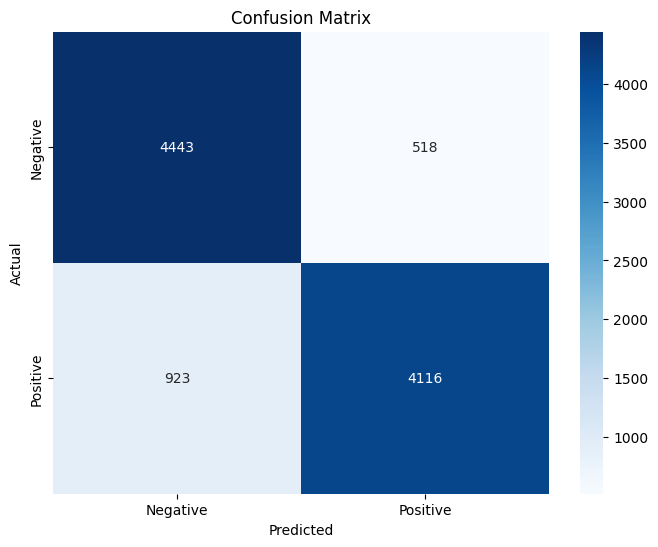

In [ ]:
# Create the test dataset and data loader
X_test_glove = tokenizer.texts_to_sequences(X_test.values)
X_test_glove = pad_sequences(X_test_glove, maxlen=128)
test_dataset = IMDBDataset(X_test_glove, y_test.values)
test_loader = DataLoader(test_dataset, batch_size=8)

# Make predictions on the test set
predictions, sentiment = evaluate(test_loader, model, device)
predictions = np.array(predictions) >= 0.5

# Calculate metrics
accuracy = accuracy_score(sentiment, predictions)
precision = precision_score(sentiment, predictions)
recall = recall_score(sentiment, predictions)
f1 = f1_score(sentiment, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(sentiment, predictions))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(sentiment, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title Learning Rate = 0.05
learning_rate = 0.05

# Create the model instance
model = LSTM(get_embedding_matrix(embeddings, word_index, vocab_size))

# Move the model to the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

# Create the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Initialize early stopping variables
best_val_accuracy = 0.0
current_patience = 0
patience = 3
# threshold = 0.88

# Start the training loop with early stopping
for epoch in range(num_epochs):
    train(train_loader, model, optimizer, device)
    predictions, sentiment = evaluate(val_loader, model, device)
    predictions = np.array(predictions) >= 0.5
    accuracy = accuracy_score(sentiment, predictions)
    precision = precision_score(sentiment, predictions)
    recall = recall_score(sentiment, predictions)
    f1 = f1_score(sentiment, predictions)
    print(f"Epoch: {epoch+1} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f}")

    # Check for improvement in validation F1 score
    if accuracy > best_val_accuracy:
        best_val_accuracy = accuracy
        current_patience = 0
    else:
        current_patience += 1
        if current_patience >= patience:
            print(f"Early stopping at epoch {epoch + 1}. No improvement in validation accuracy score.")
            break

cuda
Epoch: 1 | Accuracy: 0.8085 | Precision: 0.7883 | Recall: 0.8399 | F1 Score: 0.8133
Epoch: 2 | Accuracy: 0.7619 | Precision: 0.8847 | Recall: 0.5985 | F1 Score: 0.7140
Epoch: 3 | Accuracy: 0.7744 | Precision: 0.8021 | Recall: 0.7244 | F1 Score: 0.7613
Epoch: 4 | Accuracy: 0.7531 | Precision: 0.8438 | Recall: 0.6172 | F1 Score: 0.7129
Early stopping at epoch 4. No improvement in validation accuracy score.


Accuracy: 0.7561
Precision: 0.8436
Recall: 0.6335
F1 Score: 0.7236

Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.88      0.78      4961
         1.0       0.84      0.63      0.72      5039

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.75     10000
weighted avg       0.77      0.76      0.75     10000



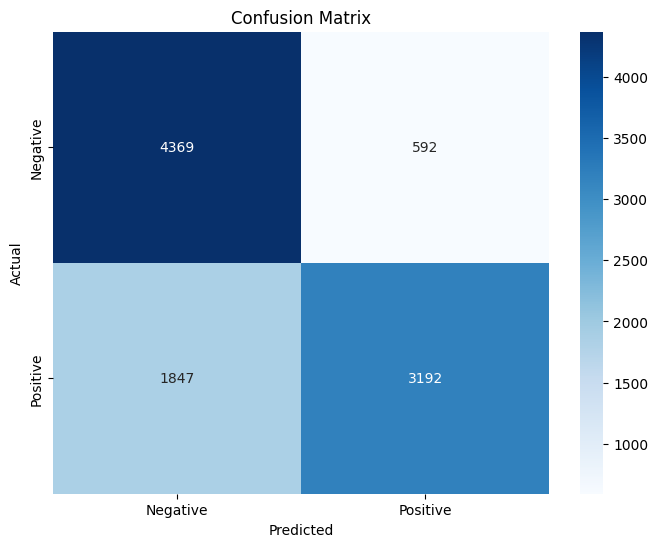

In [ ]:
# Create the test dataset and data loader
X_test_glove = tokenizer.texts_to_sequences(X_test.values)
X_test_glove = pad_sequences(X_test_glove, maxlen=128)
test_dataset = IMDBDataset(X_test_glove, y_test.values)
test_loader = DataLoader(test_dataset, batch_size=8)

# Make predictions on the test set
predictions, sentiment = evaluate(test_loader, model, device)
predictions = np.array(predictions) >= 0.5

# Calculate metrics
accuracy = accuracy_score(sentiment, predictions)
precision = precision_score(sentiment, predictions)
recall = recall_score(sentiment, predictions)
f1 = f1_score(sentiment, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(sentiment, predictions))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(sentiment, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title Batch size = 32
train_batch_size = 32
val_batch_size = 8

# Create the training and validation data loaders
train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=val_batch_size)


# Define the hyperparameters
learning_rate = 0.001
num_epochs = 20

# Create the model instance
model = LSTM(get_embedding_matrix(embeddings, word_index, vocab_size))

# Move the model to the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

# Create the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Initialize early stopping variables
best_val_accuracy = 0.0
current_patience = 0
patience = 3
threshold = 0.88

# Start the training loop with early stopping
for epoch in range(num_epochs):
    train(train_loader, model, optimizer, device)
    predictions, sentiment = evaluate(val_loader, model, device)
    predictions = np.array(predictions) >= 0.5
    accuracy = accuracy_score(sentiment, predictions)
    precision = precision_score(sentiment, predictions)
    recall = recall_score(sentiment, predictions)
    f1 = f1_score(sentiment, predictions)
    print(f"Epoch: {epoch+1} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f}")

    # Check for improvement in validation F1 score
    if accuracy > best_val_accuracy:
        best_val_accuracy = accuracy
        current_patience = 0
    else:
        current_patience += 1
        if current_patience >= patience and accuracy >= threshold:
            print(f"Early stopping at epoch {epoch + 1}. No improvement in validation accuracy score.")
            break


cuda
Epoch: 1 | Accuracy: 0.8375 | Precision: 0.9220 | Recall: 0.7350 | F1 Score: 0.8179
Epoch: 2 | Accuracy: 0.8701 | Precision: 0.8521 | Recall: 0.8935 | F1 Score: 0.8723
Epoch: 3 | Accuracy: 0.8516 | Precision: 0.9411 | Recall: 0.7480 | F1 Score: 0.8335
Epoch: 4 | Accuracy: 0.8461 | Precision: 0.9403 | Recall: 0.7370 | F1 Score: 0.8263
Epoch: 5 | Accuracy: 0.8629 | Precision: 0.9313 | Recall: 0.7815 | F1 Score: 0.8499
Epoch: 6 | Accuracy: 0.8842 | Precision: 0.8866 | Recall: 0.8794 | F1 Score: 0.8830
Epoch: 7 | Accuracy: 0.8825 | Precision: 0.8895 | Recall: 0.8716 | F1 Score: 0.8805
Epoch: 8 | Accuracy: 0.8792 | Precision: 0.8654 | Recall: 0.8963 | F1 Score: 0.8806
Epoch: 9 | Accuracy: 0.8809 | Precision: 0.8788 | Recall: 0.8817 | F1 Score: 0.8803
Early stopping at epoch 9. No improvement in validation accuracy score.


Accuracy: 0.8775
Precision: 0.8782
Recall: 0.8787
F1 Score: 0.8785

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      4961
         1.0       0.88      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



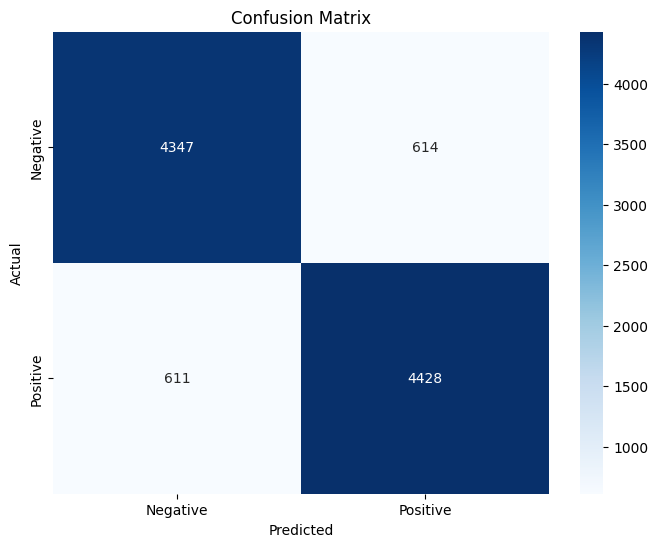

In [ ]:
# Create the test dataset and data loader
X_test_glove = tokenizer.texts_to_sequences(X_test.values)
X_test_glove = pad_sequences(X_test_glove, maxlen=128)
test_dataset = IMDBDataset(X_test_glove, y_test.values)
test_loader = DataLoader(test_dataset, batch_size=8)

# Make predictions on the test set
predictions, sentiment = evaluate(test_loader, model, device)
predictions = np.array(predictions) >= 0.5

# Calculate metrics
accuracy = accuracy_score(sentiment, predictions)
precision = precision_score(sentiment, predictions)
recall = recall_score(sentiment, predictions)
f1 = f1_score(sentiment, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(sentiment, predictions))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(sentiment, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title Batch size = 8
train_batch_size = 8
val_batch_size = 8

# Create the training and validation data loaders
train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=val_batch_size)


# Define the hyperparameters
learning_rate = 0.001
num_epochs = 20

# Create the model instance
model = LSTM(get_embedding_matrix(embeddings, word_index, vocab_size))

# Move the model to the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

# Create the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Initialize early stopping variables
best_val_accuracy = 0.0
current_patience = 0
patience = 3
threshold = 0.88

# Start the training loop with early stopping
for epoch in range(num_epochs):
    train(train_loader, model, optimizer, device)
    predictions, sentiment = evaluate(val_loader, model, device)
    predictions = np.array(predictions) >= 0.5
    accuracy = accuracy_score(sentiment, predictions)
    precision = precision_score(sentiment, predictions)
    recall = recall_score(sentiment, predictions)
    f1 = f1_score(sentiment, predictions)
    print(f"Epoch: {epoch+1} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f}")

    # Check for improvement in validation F1 score
    if accuracy > best_val_accuracy:
        best_val_accuracy = accuracy
        current_patience = 0
    else:
        current_patience += 1
        if current_patience >= patience and accuracy >= threshold:
            print(f"Early stopping at epoch {epoch + 1}. No improvement in validation accuracy score.")
            break


cuda
Epoch: 1 | Accuracy: 0.8670 | Precision: 0.8934 | Recall: 0.8314 | F1 Score: 0.8613
Epoch: 2 | Accuracy: 0.8794 | Precision: 0.9069 | Recall: 0.8437 | F1 Score: 0.8742
Epoch: 3 | Accuracy: 0.8841 | Precision: 0.9105 | Recall: 0.8502 | F1 Score: 0.8793
Epoch: 4 | Accuracy: 0.8730 | Precision: 0.9282 | Recall: 0.8067 | F1 Score: 0.8632
Epoch: 5 | Accuracy: 0.8772 | Precision: 0.9128 | Recall: 0.8324 | F1 Score: 0.8707
Epoch: 6 | Accuracy: 0.8808 | Precision: 0.9061 | Recall: 0.8477 | F1 Score: 0.8759
Early stopping at epoch 6. No improvement in validation accuracy score.


Accuracy: 0.8816
Precision: 0.9091
Recall: 0.8500
F1 Score: 0.8786

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      4961
         1.0       0.91      0.85      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



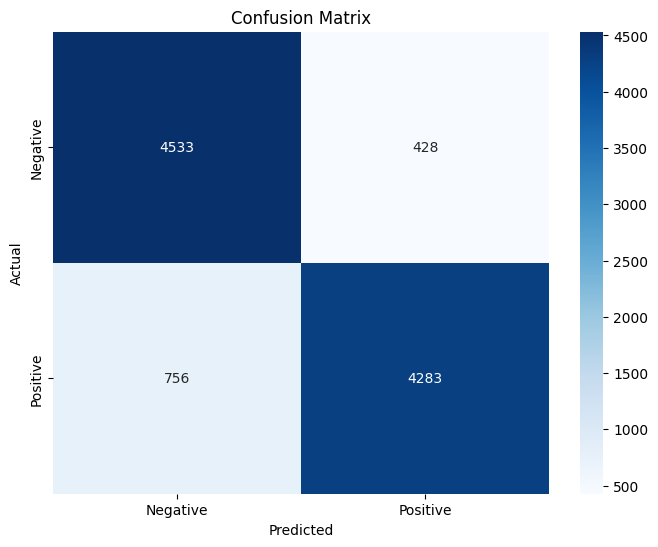

In [ ]:
# Create the test dataset and data loader
X_test_glove = tokenizer.texts_to_sequences(X_test.values)
X_test_glove = pad_sequences(X_test_glove, maxlen=128)
test_dataset = IMDBDataset(X_test_glove, y_test.values)
test_loader = DataLoader(test_dataset, batch_size=8)

# Make predictions on the test set
predictions, sentiment = evaluate(test_loader, model, device)
predictions = np.array(predictions) >= 0.5

# Calculate metrics
accuracy = accuracy_score(sentiment, predictions)
precision = precision_score(sentiment, predictions)
recall = recall_score(sentiment, predictions)
f1 = f1_score(sentiment, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(sentiment, predictions))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(sentiment, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title Hidden Size = 64
class LSTM(nn.Module):
    def __init__(self, embedding_matrix):
        super(LSTM, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=embedding_matrix.shape[0], embedding_dim=embedding_matrix.shape[1])
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype = torch.float32))
        self.embedding.weight.requires_grad = False

        self.lstm = nn.LSTM(embedding_matrix.shape[1], 64, batch_first=True, bidirectional=True)
        self.linear = nn.Linear(256, 1)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        avg_pool = torch.mean(x, 1)
        max_pool, _ = torch.max(x, 1)
        out = torch.cat((avg_pool, max_pool), 1)
        out = self.linear(out)
        return out

train_batch_size = 16
val_batch_size = 8

# Create the training and validation data loaders
train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=val_batch_size)


# Define the hyperparameters
learning_rate = 0.001
num_epochs = 20

# Create the model instance
model = LSTM(get_embedding_matrix(embeddings, word_index, vocab_size))

# Move the model to the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

# Create the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Initialize early stopping variables
best_val_accuracy = 0.0
current_patience = 0
patience = 3
# threshold = 0.88

# Start the training loop with early stopping
for epoch in range(num_epochs):
    train(train_loader, model, optimizer, device)
    predictions, sentiment = evaluate(val_loader, model, device)
    predictions = np.array(predictions) >= 0.5
    accuracy = accuracy_score(sentiment, predictions)
    precision = precision_score(sentiment, predictions)
    recall = recall_score(sentiment, predictions)
    f1 = f1_score(sentiment, predictions)
    print(f"Epoch: {epoch+1} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f}")

    # Check for improvement in validation F1 score
    if accuracy > best_val_accuracy:
        best_val_accuracy = accuracy
        current_patience = 0
    else:
        current_patience += 1
        if current_patience >= patience:
            print(f"Early stopping at epoch {epoch + 1}. No improvement in validation accuracy score.")
            break

cuda
Epoch: 1 | Accuracy: 0.8594 | Precision: 0.8546 | Recall: 0.8638 | F1 Score: 0.8592
Epoch: 2 | Accuracy: 0.8774 | Precision: 0.8848 | Recall: 0.8658 | F1 Score: 0.8752
Epoch: 3 | Accuracy: 0.8822 | Precision: 0.8816 | Recall: 0.8812 | F1 Score: 0.8814
Epoch: 4 | Accuracy: 0.8849 | Precision: 0.8861 | Recall: 0.8814 | F1 Score: 0.8838
Epoch: 5 | Accuracy: 0.8786 | Precision: 0.9050 | Recall: 0.8442 | F1 Score: 0.8736
Epoch: 6 | Accuracy: 0.8774 | Precision: 0.9081 | Recall: 0.8379 | F1 Score: 0.8716
Epoch: 7 | Accuracy: 0.8816 | Precision: 0.8836 | Recall: 0.8772 | F1 Score: 0.8804
Early stopping at epoch 7. No improvement in validation accuracy score.


Accuracy: 0.8824
Precision: 0.8821
Recall: 0.8849
F1 Score: 0.8835

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      4961
         1.0       0.88      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



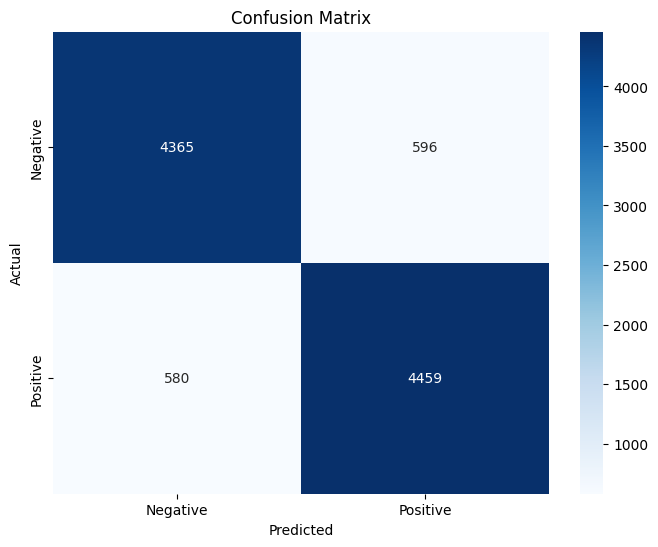

In [ ]:
# Create the test dataset and data loader
X_test_glove = tokenizer.texts_to_sequences(X_test.values)
X_test_glove = pad_sequences(X_test_glove, maxlen=128)
test_dataset = IMDBDataset(X_test_glove, y_test.values)
test_loader = DataLoader(test_dataset, batch_size=8)

# Make predictions on the test set
predictions, sentiment = evaluate(test_loader, model, device)
predictions = np.array(predictions) >= 0.5

# Calculate metrics
accuracy = accuracy_score(sentiment, predictions)
precision = precision_score(sentiment, predictions)
recall = recall_score(sentiment, predictions)
f1 = f1_score(sentiment, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(sentiment, predictions))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(sentiment, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title Hidden Size = 256
class LSTM(nn.Module):
    def __init__(self, embedding_matrix):
        super(LSTM, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=embedding_matrix.shape[0], embedding_dim=embedding_matrix.shape[1])
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype = torch.float32))
        self.embedding.weight.requires_grad = False

        self.lstm = nn.LSTM(embedding_matrix.shape[1], 256, batch_first=True, bidirectional=True)
        self.linear = nn.Linear(1024, 1)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        avg_pool = torch.mean(x, 1)
        max_pool, _ = torch.max(x, 1)
        out = torch.cat((avg_pool, max_pool), 1)
        out = self.linear(out)
        return out

train_batch_size = 16
val_batch_size = 8

# Create the training and validation data loaders
train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=val_batch_size)


# Define the hyperparameters
learning_rate = 0.001
num_epochs = 20

# Create the model instance
model = LSTM(get_embedding_matrix(embeddings, word_index, vocab_size))

# Move the model to the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

# Create the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Initialize early stopping variables
best_val_accuracy = 0.0
current_patience = 0
patience = 3
threshold = 0.88

# Start the training loop with early stopping
for epoch in range(num_epochs):
    train(train_loader, model, optimizer, device)
    predictions, sentiment = evaluate(val_loader, model, device)
    predictions = np.array(predictions) >= 0.5
    accuracy = accuracy_score(sentiment, predictions)
    precision = precision_score(sentiment, predictions)
    recall = recall_score(sentiment, predictions)
    f1 = f1_score(sentiment, predictions)
    print(f"Epoch: {epoch+1} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f}")

    # Check for improvement in validation F1 score
    if accuracy > best_val_accuracy:
        best_val_accuracy = accuracy
        current_patience = 0
    else:
        current_patience += 1
        if current_patience >= patience and accuracy >= threshold:
            print(f"Early stopping at epoch {epoch + 1}. No improvement in validation accuracy score.")
            break

cuda
Epoch: 1 | Accuracy: 0.8423 | Precision: 0.9296 | Recall: 0.7382 | F1 Score: 0.8230
Epoch: 2 | Accuracy: 0.8686 | Precision: 0.9172 | Recall: 0.8085 | F1 Score: 0.8594
Epoch: 3 | Accuracy: 0.8804 | Precision: 0.9212 | Recall: 0.8301 | F1 Score: 0.8733
Epoch: 4 | Accuracy: 0.8834 | Precision: 0.9146 | Recall: 0.8439 | F1 Score: 0.8779
Epoch: 5 | Accuracy: 0.8786 | Precision: 0.9146 | Recall: 0.8334 | F1 Score: 0.8721
Epoch: 6 | Accuracy: 0.8845 | Precision: 0.9041 | Recall: 0.8585 | F1 Score: 0.8807
Epoch: 7 | Accuracy: 0.8825 | Precision: 0.9056 | Recall: 0.8523 | F1 Score: 0.8781
Epoch: 8 | Accuracy: 0.8858 | Precision: 0.8842 | Recall: 0.8860 | F1 Score: 0.8851
Epoch: 9 | Accuracy: 0.8841 | Precision: 0.8727 | Recall: 0.8976 | F1 Score: 0.8850
Epoch: 10 | Accuracy: 0.8730 | Precision: 0.9255 | Recall: 0.8095 | F1 Score: 0.8636
Epoch: 11 | Accuracy: 0.8851 | Precision: 0.8856 | Recall: 0.8827 | F1 Score: 0.8842
Early stopping at epoch 11. No improvement in validation accuracy sco

Accuracy: 0.8799
Precision: 0.8808
Recall: 0.8809
F1 Score: 0.8808

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      4961
         1.0       0.88      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



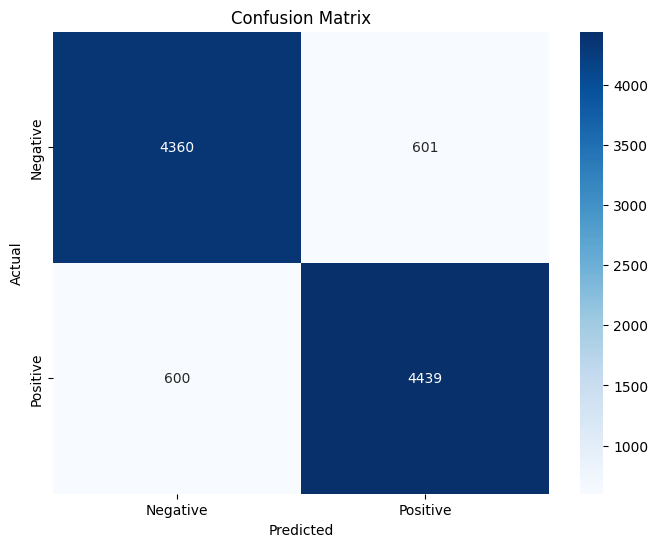

In [ ]:
# Create the test dataset and data loader
X_test_glove = tokenizer.texts_to_sequences(X_test.values)
X_test_glove = pad_sequences(X_test_glove, maxlen=128)
test_dataset = IMDBDataset(X_test_glove, y_test.values)
test_loader = DataLoader(test_dataset, batch_size=8)

# Make predictions on the test set
predictions, sentiment = evaluate(test_loader, model, device)
predictions = np.array(predictions) >= 0.5

# Calculate metrics
accuracy = accuracy_score(sentiment, predictions)
precision = precision_score(sentiment, predictions)
recall = recall_score(sentiment, predictions)
f1 = f1_score(sentiment, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(sentiment, predictions))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(sentiment, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title Dropout = 0.2
class LSTM(nn.Module):
    def __init__(self, embedding_matrix):
        super(LSTM, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=embedding_matrix.shape[0], embedding_dim=embedding_matrix.shape[1])
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype = torch.float32))
        self.embedding.weight.requires_grad = False

        self.lstm = nn.LSTM(embedding_matrix.shape[1], 128, batch_first=True, bidirectional=True, dropout=0.2)
        self.linear = nn.Linear(512, 1)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        avg_pool = torch.mean(x, 1)
        max_pool, _ = torch.max(x, 1)
        out = torch.cat((avg_pool, max_pool), 1)
        out = self.linear(out)
        return out

train_batch_size = 16
val_batch_size = 8

# Create the training and validation data loaders
train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=val_batch_size)


# Define the hyperparameters
learning_rate = 0.001
num_epochs = 20

# Create the model instance
model = LSTM(get_embedding_matrix(embeddings, word_index, vocab_size))

# Move the model to the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

# Create the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Initialize early stopping variables
best_val_accuracy = 0.0
current_patience = 0
patience = 3
threshold = 0.88

# Start the training loop with early stopping
for epoch in range(num_epochs):
    train(train_loader, model, optimizer, device)
    predictions, sentiment = evaluate(val_loader, model, device)
    predictions = np.array(predictions) >= 0.5
    accuracy = accuracy_score(sentiment, predictions)
    precision = precision_score(sentiment, predictions)
    recall = recall_score(sentiment, predictions)
    f1 = f1_score(sentiment, predictions)
    print(f"Epoch: {epoch+1} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f}")

    # Check for improvement in validation F1 score
    if accuracy > best_val_accuracy:
        best_val_accuracy = accuracy
        current_patience = 0
    else:
        current_patience += 1
        if current_patience >= patience and accuracy >= threshold:
            print(f"Early stopping at epoch {epoch + 1}. No improvement in validation accuracy score.")
            break

cuda
Epoch: 1 | Accuracy: 0.8494 | Precision: 0.8019 | Recall: 0.9252 | F1 Score: 0.8592
Epoch: 2 | Accuracy: 0.8784 | Precision: 0.8616 | Recall: 0.8996 | F1 Score: 0.8802
Epoch: 3 | Accuracy: 0.8830 | Precision: 0.8637 | Recall: 0.9076 | F1 Score: 0.8851
Epoch: 4 | Accuracy: 0.8798 | Precision: 0.9225 | Recall: 0.8273 | F1 Score: 0.8723
Epoch: 5 | Accuracy: 0.8821 | Precision: 0.9121 | Recall: 0.8439 | F1 Score: 0.8767
Epoch: 6 | Accuracy: 0.8805 | Precision: 0.9019 | Recall: 0.8520 | F1 Score: 0.8763
Early stopping at epoch 6. No improvement in validation accuracy score.


Accuracy: 0.8810
Precision: 0.8992
Recall: 0.8603
F1 Score: 0.8793

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      4961
         1.0       0.90      0.86      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



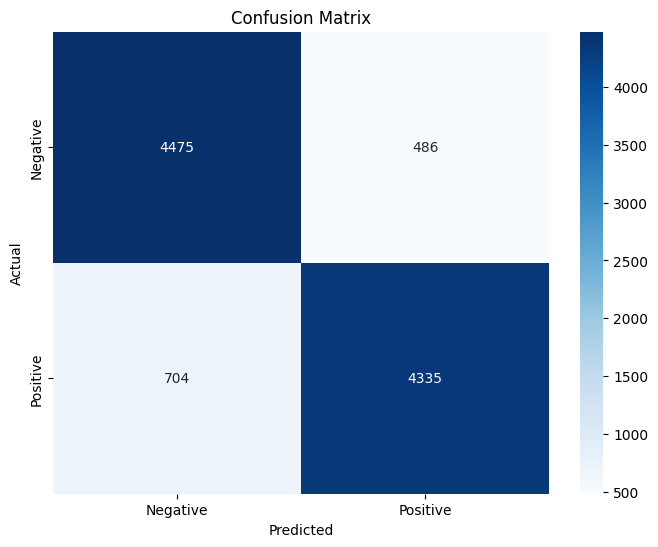

In [ ]:
# Create the test dataset and data loader
X_test_glove = tokenizer.texts_to_sequences(X_test.values)
X_test_glove = pad_sequences(X_test_glove, maxlen=128)
test_dataset = IMDBDataset(X_test_glove, y_test.values)
test_loader = DataLoader(test_dataset, batch_size=8)

# Make predictions on the test set
predictions, sentiment = evaluate(test_loader, model, device)
predictions = np.array(predictions) >= 0.5

# Calculate metrics
accuracy = accuracy_score(sentiment, predictions)
precision = precision_score(sentiment, predictions)
recall = recall_score(sentiment, predictions)
f1 = f1_score(sentiment, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(sentiment, predictions))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(sentiment, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title Dropout = 0.5
class LSTM(nn.Module):
    def __init__(self, embedding_matrix):
        super(LSTM, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=embedding_matrix.shape[0], embedding_dim=embedding_matrix.shape[1])
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype = torch.float32))
        self.embedding.weight.requires_grad = False

        self.lstm = nn.LSTM(embedding_matrix.shape[1], 128, batch_first=True, bidirectional=True, dropout=0.5)
        self.linear = nn.Linear(512, 1)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        avg_pool = torch.mean(x, 1)
        max_pool, _ = torch.max(x, 1)
        out = torch.cat((avg_pool, max_pool), 1)
        out = self.linear(out)
        return out

train_batch_size = 16
val_batch_size = 8

# Create the training and validation data loaders
train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=val_batch_size)


# Define the hyperparameters
learning_rate = 0.001
num_epochs = 20

# Create the model instance
model = LSTM(get_embedding_matrix(embeddings, word_index, vocab_size))

# Move the model to the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

# Create the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Initialize early stopping variables
best_val_accuracy = 0.0
current_patience = 0
patience = 3
threshold = 0.88

# Start the training loop with early stopping
for epoch in range(num_epochs):
    train(train_loader, model, optimizer, device)
    predictions, sentiment = evaluate(val_loader, model, device)
    predictions = np.array(predictions) >= 0.5
    accuracy = accuracy_score(sentiment, predictions)
    precision = precision_score(sentiment, predictions)
    recall = recall_score(sentiment, predictions)
    f1 = f1_score(sentiment, predictions)
    print(f"Epoch: {epoch+1} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f}")

    # Check for improvement in validation F1 score
    if accuracy > best_val_accuracy:
        best_val_accuracy = accuracy
        current_patience = 0
    else:
        current_patience += 1
        if current_patience >= patience and accuracy >= threshold:
            print(f"Early stopping at epoch {epoch + 1}. No improvement in validation accuracy score.")
            break

cuda
Epoch: 1 | Accuracy: 0.8650 | Precision: 0.8885 | Recall: 0.8326 | F1 Score: 0.8597
Epoch: 2 | Accuracy: 0.8631 | Precision: 0.9250 | Recall: 0.7883 | F1 Score: 0.8512
Epoch: 3 | Accuracy: 0.8831 | Precision: 0.8999 | Recall: 0.8603 | F1 Score: 0.8797
Epoch: 4 | Accuracy: 0.8830 | Precision: 0.8847 | Recall: 0.8789 | F1 Score: 0.8818
Epoch: 5 | Accuracy: 0.8764 | Precision: 0.9158 | Recall: 0.8271 | F1 Score: 0.8692
Epoch: 6 | Accuracy: 0.8764 | Precision: 0.8396 | Recall: 0.9285 | F1 Score: 0.8818
Epoch: 7 | Accuracy: 0.8725 | Precision: 0.9049 | Recall: 0.8306 | F1 Score: 0.8661
Epoch: 8 | Accuracy: 0.8786 | Precision: 0.8668 | Recall: 0.8928 | F1 Score: 0.8796
Epoch: 9 | Accuracy: 0.8768 | Precision: 0.8984 | Recall: 0.8477 | F1 Score: 0.8723
Epoch: 10 | Accuracy: 0.8775 | Precision: 0.8681 | Recall: 0.8882 | F1 Score: 0.8781
Epoch: 11 | Accuracy: 0.8729 | Precision: 0.9018 | Recall: 0.8349 | F1 Score: 0.8671
Epoch: 12 | Accuracy: 0.8762 | Precision: 0.8581 | Recall: 0.8996 | F

Accuracy: 0.8821
Precision: 0.8704
Recall: 0.9000
F1 Score: 0.8850

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88      4961
         1.0       0.87      0.90      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



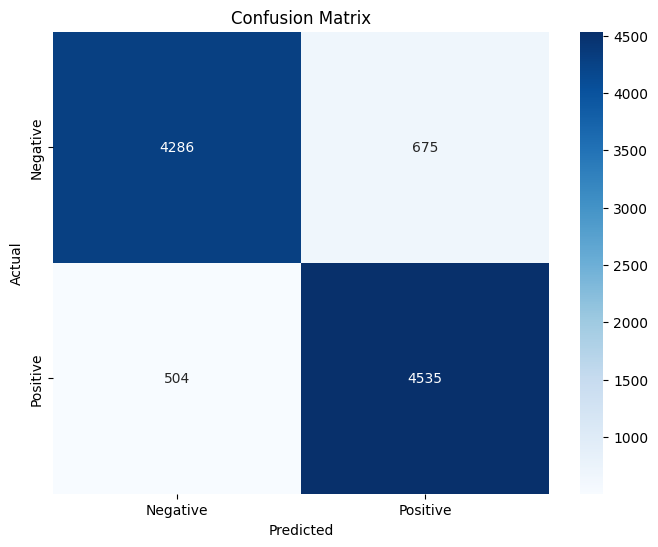

In [ ]:
# Create the test dataset and data loader
X_test_glove = tokenizer.texts_to_sequences(X_test.values)
X_test_glove = pad_sequences(X_test_glove, maxlen=128)
test_dataset = IMDBDataset(X_test_glove, y_test.values)
test_loader = DataLoader(test_dataset, batch_size=8)

# Make predictions on the test set
predictions, sentiment = evaluate(test_loader, model, device)
predictions = np.array(predictions) >= 0.5

# Calculate metrics
accuracy = accuracy_score(sentiment, predictions)
precision = precision_score(sentiment, predictions)
recall = recall_score(sentiment, predictions)
f1 = f1_score(sentiment, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(sentiment, predictions))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(sentiment, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Dataset Shifts for Deep Learning Pipeline

----

We will do our dataset shifts on the most capable model, as we derived from hyperparameter search.

In [ ]:
#@title Initialized and Get the tuned BiLSTM
train_batch_size = 32
val_batch_size = 8

# Tokenize the reviews
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train.values.tolist())
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

# Convert the reviews to sequences
X = tokenizer.texts_to_sequences(X_train.values)

# Pad the sequences
X = pad_sequences(X, maxlen=128)

# Create the dataset object
dataset = IMDBDataset(X, y_train.values)

# Create the training and validation splits
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create the training and validation data loaders
train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=val_batch_size)


class LSTM(nn.Module):
    def __init__(self, embedding_matrix):
        super(LSTM, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=embedding_matrix.shape[0], embedding_dim=embedding_matrix.shape[1])
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype = torch.float32))
        self.embedding.weight.requires_grad = False

        self.lstm = nn.LSTM(embedding_matrix.shape[1], 256, batch_first=True, bidirectional=True, dropout=0.2)
        self.linear = nn.Linear(1024, 1)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        avg_pool = torch.mean(x, 1)
        max_pool, _ = torch.max(x, 1)
        out = torch.cat((avg_pool, max_pool), 1)
        out = self.linear(out)
        return out

# Define the hyperparameters
learning_rate = 0.001
num_epochs = 20

criterion = nn.BCEWithLogitsLoss()

def train(data_loader, model, optimizer, device):
    model.train()
    for data in data_loader:
        reviews = data['review'].to(device, dtype = torch.long)
        sentiment = data['sentiment'].to(device, dtype=torch.float)
        optimizer.zero_grad()
        predictions = model(reviews)
        loss = criterion(predictions, sentiment.unsqueeze(1))
        loss.backward()
        optimizer.step()

def evaluate(data_loader, model, device):
    model.eval()
    final_predictions = []
    final_sentiment = []
    with torch.no_grad():
        for data in data_loader:
            reviews = data['review'].to(device, dtype=torch.long)
            sentiment = data['sentiment'].to(device, dtype=torch.float)
            predictions = model(reviews)
            predictions = predictions.cpu().numpy().tolist()
            sentiment = data['sentiment'].cpu().numpy().tolist()
            final_predictions.extend(predictions)
            final_sentiment.extend(sentiment)
    return final_predictions, final_sentiment



# Create the model instance
model = LSTM(get_embedding_matrix(embeddings, word_index, vocab_size))

# Move the model to the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

# Create the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Initialize early stopping variables
best_val_accuracy = 0.0
current_patience = 0
patience = 3
threshold = 0.88

# Start the training loop with early stopping
for epoch in range(num_epochs):
    train(train_loader, model, optimizer, device)
    predictions, sentiment = evaluate(val_loader, model, device)
    predictions = np.array(predictions) >= 0.5
    accuracy = accuracy_score(sentiment, predictions)
    precision = precision_score(sentiment, predictions)
    recall = recall_score(sentiment, predictions)
    f1 = f1_score(sentiment, predictions)
    print(f"Epoch: {epoch+1} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f}")

    # Check for improvement in validation F1 score
    if accuracy > best_val_accuracy:
        best_val_accuracy = accuracy
        current_patience = 0
    else:
        current_patience += 1
        if current_patience >= patience and accuracy >= threshold:
            print(f"Early stopping at epoch {epoch + 1}. No improvement in validation accuracy score.")
            break

cuda
Epoch: 1 | Accuracy: 0.8522 | Precision: 0.9005 | Recall: 0.7940 | F1 Score: 0.8439
Epoch: 2 | Accuracy: 0.8575 | Precision: 0.9284 | Recall: 0.7766 | F1 Score: 0.8458
Epoch: 3 | Accuracy: 0.8832 | Precision: 0.9026 | Recall: 0.8609 | F1 Score: 0.8812
Epoch: 4 | Accuracy: 0.8856 | Precision: 0.8987 | Recall: 0.8708 | F1 Score: 0.8845
Epoch: 5 | Accuracy: 0.8875 | Precision: 0.8861 | Recall: 0.8909 | F1 Score: 0.8885
Epoch: 6 | Accuracy: 0.8778 | Precision: 0.9059 | Recall: 0.8447 | F1 Score: 0.8743
Epoch: 7 | Accuracy: 0.8830 | Precision: 0.8874 | Recall: 0.8790 | F1 Score: 0.8832
Epoch: 8 | Accuracy: 0.8758 | Precision: 0.8506 | Recall: 0.9135 | F1 Score: 0.8809
Epoch: 9 | Accuracy: 0.8801 | Precision: 0.8838 | Recall: 0.8770 | F1 Score: 0.8804
Early stopping at epoch 9. No improvement in validation accuracy score.


Accuracy: 0.8820
Precision: 0.8880
Recall: 0.8764
F1 Score: 0.8821

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      4961
         1.0       0.89      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



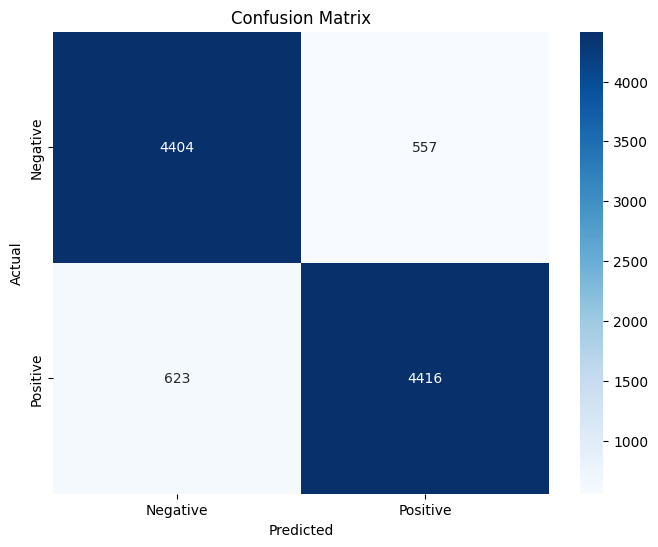

In [ ]:
# Create the test dataset and data loader
X_test_glove = tokenizer.texts_to_sequences(X_test.values)
X_test_glove = pad_sequences(X_test_glove, maxlen=128)
test_dataset = IMDBDataset(X_test_glove, y_test.values)
test_loader = DataLoader(test_dataset, batch_size=16)

# Make predictions on the test set
predictions, sentiment = evaluate(test_loader, model, device)
predictions = np.array(predictions) >= 0.5

# Calculate metrics
accuracy = accuracy_score(sentiment, predictions)
precision = precision_score(sentiment, predictions)
recall = recall_score(sentiment, predictions)
f1 = f1_score(sentiment, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(sentiment, predictions))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(sentiment, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7656
Precision: 0.6907
Recall: 0.9686
F1 Score: 0.8064

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.56      0.70      4961
         1.0       0.69      0.97      0.81      5039

    accuracy                           0.77     10000
   macro avg       0.82      0.76      0.75     10000
weighted avg       0.82      0.77      0.76     10000



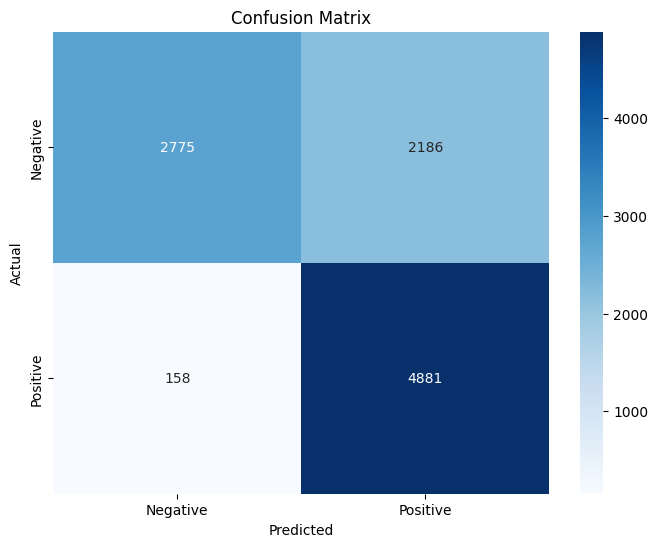

In [ ]:
#@title Test on Original Review (no preprocessing)
df_shift = pd.read_csv('/content/drive/My Drive/CIS519/519_Project/imdb_dataset.csv')

# One_hot_encoded for sentitment label
class_to_num_mapping = {'positive': 1, 'negative': 0}
df_shift['sentiment'] = df_shift['sentiment'].replace(class_to_num_mapping)

# Split the data into training and testing sets
X_train_shift, X_test_shift, y_train_shift, y_test_shift = train_test_split(df_shift['review'], df_shift['sentiment'], test_size=0.2, random_state=seed)


# Create the test dataset and data loader
X_test_shift_glove = tokenizer.texts_to_sequences(X_test_shift.values)
X_test_shift_glove = pad_sequences(X_test_shift_glove, maxlen=128)
test_dataset = IMDBDataset(X_test_shift_glove, y_test_shift.values)
test_loader = DataLoader(test_dataset, batch_size=8)

# Make predictions on the test set
predictions, sentiment = evaluate(test_loader, model, device)
predictions = np.array(predictions) >= 0.5

# Calculate metrics
accuracy = accuracy_score(sentiment, predictions)
precision = precision_score(sentiment, predictions)
recall = recall_score(sentiment, predictions)
f1 = f1_score(sentiment, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(sentiment, predictions))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(sentiment, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8464
Precision: 0.8373
Recall: 0.8629
F1 Score: 0.8499

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      4961
         1.0       0.84      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



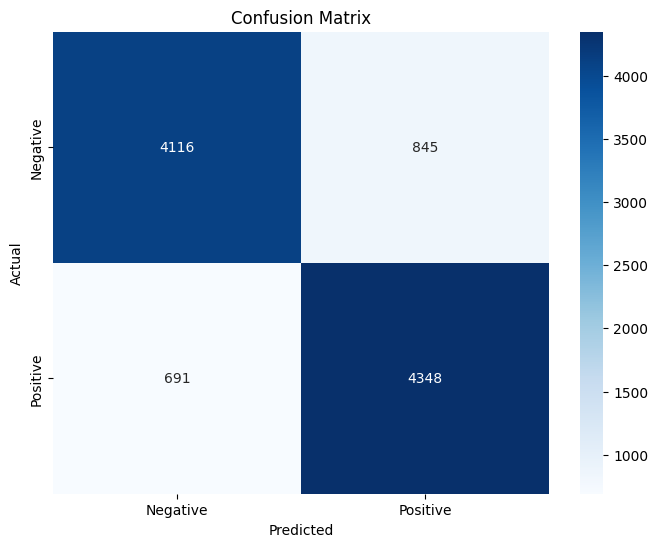

In [ ]:
#@title Test on Processed Data (without lemmatization)
def preprocess_text_shift(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove square brackets and texts in between
    text = re.sub(r'\[[^]]*\]', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenization
    words = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Join the words back into a string
    text = ' '.join(words)

    return text


df_shift = pd.read_csv('/content/drive/My Drive/CIS519/519_Project/imdb_dataset.csv')

# One_hot_encoded for sentitment label
class_to_num_mapping = {'positive': 1, 'negative': 0}
df_shift['sentiment'] = df_shift['sentiment'].replace(class_to_num_mapping)

# Apply on the data
df_shift['review'] = df_shift['review'].apply(preprocess_text_shift)

# Split the data into training and testing sets
X_train_shift, X_test_shift, y_train_shift, y_test_shift = train_test_split(df_shift['review'], df_shift['sentiment'], test_size=0.2, random_state=seed)


# Create the test dataset and data loader
X_test_shift_glove = tokenizer.texts_to_sequences(X_test_shift.values)
X_test_shift_glove = pad_sequences(X_test_shift_glove, maxlen=128)
test_dataset = IMDBDataset(X_test_shift_glove, y_test_shift.values)
test_loader = DataLoader(test_dataset, batch_size=8)

# Make predictions on the test set
predictions, sentiment = evaluate(test_loader, model, device)
predictions = np.array(predictions) >= 0.5

# Calculate metrics
accuracy = accuracy_score(sentiment, predictions)
precision = precision_score(sentiment, predictions)
recall = recall_score(sentiment, predictions)
f1 = f1_score(sentiment, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(sentiment, predictions))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(sentiment, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8464
Precision: 0.8373
Recall: 0.8629
F1 Score: 0.8499

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      4961
         1.0       0.84      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



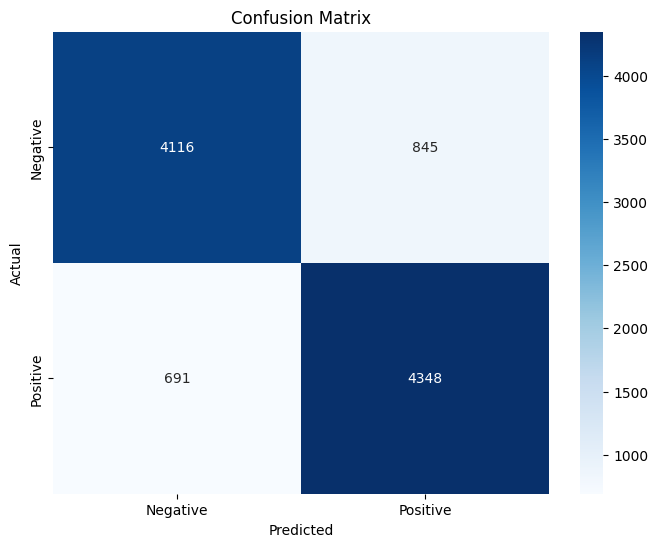

In [ ]:
#@title Test on Processed Data (without stop words removed)
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove square brackets and texts in between
    text = re.sub(r'\[[^]]*\]', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenization
    words = word_tokenize(text)

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Join the words back into a string
    text = ' '.join(words)

    return text

df_shift = pd.read_csv('/content/drive/My Drive/CIS519/519_Project/imdb_dataset.csv')

# One_hot_encoded for sentitment label
class_to_num_mapping = {'positive': 1, 'negative': 0}
df_shift['sentiment'] = df_shift['sentiment'].replace(class_to_num_mapping)

# Apply on the data
df_shift['review'] = df_shift['review'].apply(preprocess_text_shift)

# Split the data into training and testing sets
X_train_shift, X_test_shift, y_train_shift, y_test_shift = train_test_split(df_shift['review'], df_shift['sentiment'], test_size=0.2, random_state=seed)


# Create the test dataset and data loader
X_test_shift_glove = tokenizer.texts_to_sequences(X_test_shift.values)
X_test_shift_glove = pad_sequences(X_test_shift_glove, maxlen=128)
test_dataset = IMDBDataset(X_test_shift_glove, y_test_shift.values)
test_loader = DataLoader(test_dataset, batch_size=8)

# Make predictions on the test set
predictions, sentiment = evaluate(test_loader, model, device)
predictions = np.array(predictions) >= 0.5

# Calculate metrics
accuracy = accuracy_score(sentiment, predictions)
precision = precision_score(sentiment, predictions)
recall = recall_score(sentiment, predictions)
f1 = f1_score(sentiment, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(sentiment, predictions))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(sentiment, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8670
Precision: 0.8758
Recall: 0.8577
F1 Score: 0.8667

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      4961
         1.0       0.88      0.86      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



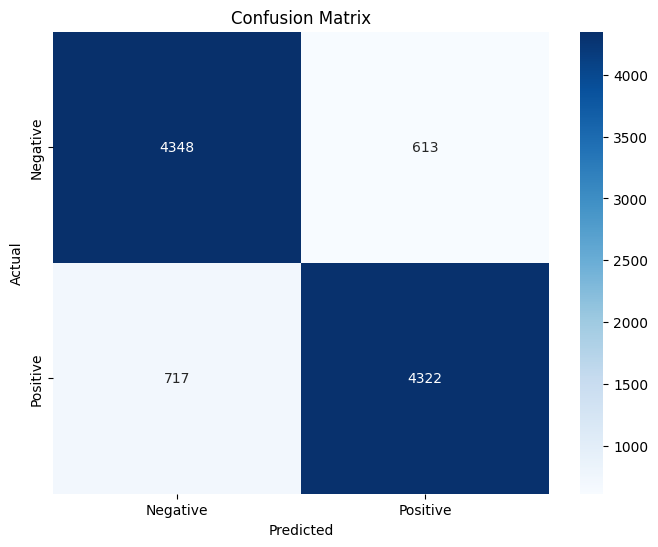

In [ ]:
#@title Test on Processed Data (without stop words removed and lemmatization)
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove square brackets and texts in between
    text = re.sub(r'\[[^]]*\]', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    return text

df_shift = pd.read_csv('/content/drive/My Drive/CIS519/519_Project/imdb_dataset.csv')

# One_hot_encoded for sentitment label
class_to_num_mapping = {'positive': 1, 'negative': 0}
df_shift['sentiment'] = df_shift['sentiment'].replace(class_to_num_mapping)

# Apply on the data
df_shift['review'] = df_shift['review'].apply(preprocess_text_shift)

# Split the data into training and testing sets
X_train_shift, X_test_shift, y_train_shift, y_test_shift = train_test_split(df_shift['review'], df_shift['sentiment'], test_size=0.2, random_state=seed)


# Create the test dataset and data loader
X_test_shift_glove = tokenizer.texts_to_sequences(X_test_shift.values)
X_test_shift_glove = pad_sequences(X_test_shift_glove, maxlen=128)
test_dataset = IMDBDataset(X_test_shift_glove, y_test_shift.values)
test_loader = DataLoader(test_dataset, batch_size=8)

# Make predictions on the test set
predictions, sentiment = evaluate(test_loader, model, device)
predictions = np.array(predictions) >= 0.5

# Calculate metrics
accuracy = accuracy_score(sentiment, predictions)
precision = precision_score(sentiment, predictions)
recall = recall_score(sentiment, predictions)
f1 = f1_score(sentiment, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(sentiment, predictions))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(sentiment, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8709
Precision: 0.8828
Recall: 0.8577
F1 Score: 0.8701

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      4961
         1.0       0.88      0.86      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



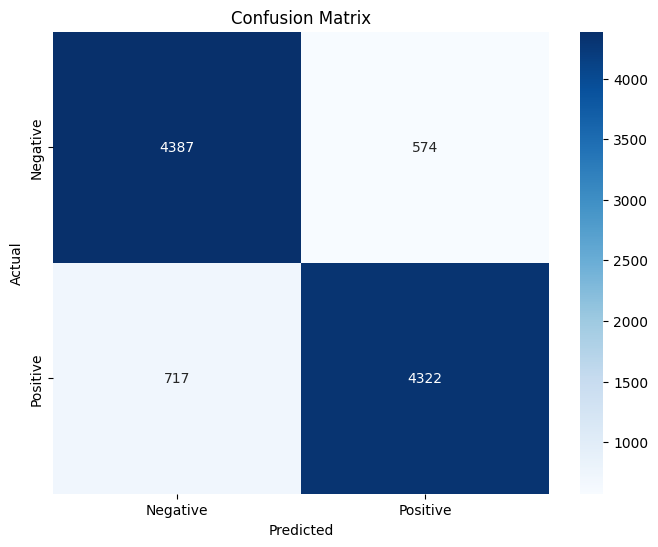

In [ ]:
#@title Test on noisy data (adding random words)
def preprocess_text_shift(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove square brackets and texts in between
    text = re.sub(r'\[[^]]*\]', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenization
    words = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Adding random words
    for i in range(10):
        words.append(random.choice(words))

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Join the words back into a string
    text = ' '.join(words)

    return text


df_shift = pd.read_csv('/content/drive/My Drive/CIS519/519_Project/imdb_dataset.csv')

# One_hot_encoded for sentitment label
class_to_num_mapping = {'positive': 1, 'negative': 0}
df_shift['sentiment'] = df_shift['sentiment'].replace(class_to_num_mapping)

# Apply on the data
df_shift['review'] = df_shift['review'].apply(preprocess_text_shift)

# Split the data into training and testing sets
X_train_shift, X_test_shift, y_train_shift, y_test_shift = train_test_split(df_shift['review'], df_shift['sentiment'], test_size=0.2, random_state=seed)


# Create the test dataset and data loader
X_test_shift_glove = tokenizer.texts_to_sequences(X_test_shift.values)
X_test_shift_glove = pad_sequences(X_test_shift_glove, maxlen=128)
test_dataset = IMDBDataset(X_test_shift_glove, y_test_shift.values)
test_loader = DataLoader(test_dataset, batch_size=8)

# Make predictions on the test set
predictions, sentiment = evaluate(test_loader, model, device)
predictions = np.array(predictions) >= 0.5

# Calculate metrics
accuracy = accuracy_score(sentiment, predictions)
precision = precision_score(sentiment, predictions)
recall = recall_score(sentiment, predictions)
f1 = f1_score(sentiment, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(sentiment, predictions))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(sentiment, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8691
Precision: 0.8765
Recall: 0.8617
F1 Score: 0.8690

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      4961
         1.0       0.88      0.86      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



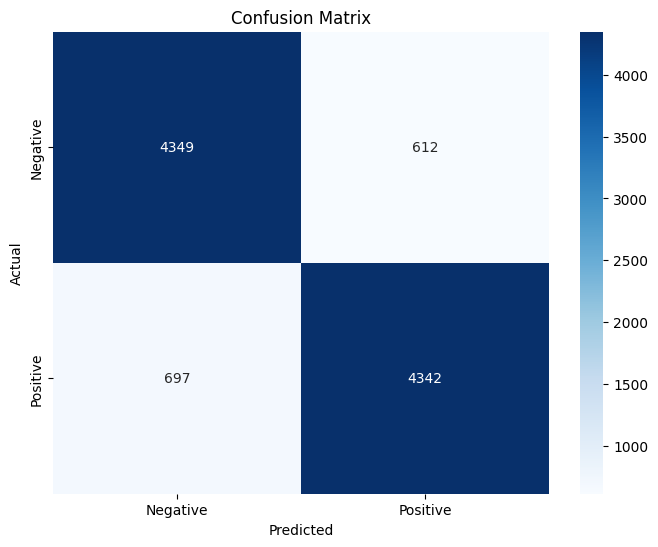

In [ ]:
#@title Test on similar review (replace synonyms)
from nltk.corpus import wordnet

def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())
    return synonyms

def preprocess_text_shift(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove square brackets and texts in between
    text = re.sub(r'\[[^]]*\]', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenization
    words = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Replace some words with synonyms
    for i in range(15):
        word = random.choice(words)
        synonyms = get_synonyms(word)
        if len(synonyms) > 0:
            words[words.index(word)] = random.choice(synonyms)

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Join the words back into a string
    text = ' '.join(words)

    return text


df_shift = pd.read_csv('/content/drive/My Drive/CIS519/519_Project/imdb_dataset.csv')

# One_hot_encoded for sentitment label
class_to_num_mapping = {'positive': 1, 'negative': 0}
df_shift['sentiment'] = df_shift['sentiment'].replace(class_to_num_mapping)

# Apply on the data
df_shift['review'] = df_shift['review'].apply(preprocess_text_shift)

# Split the data into training and testing sets
X_train_shift, X_test_shift, y_train_shift, y_test_shift = train_test_split(df_shift['review'], df_shift['sentiment'], test_size=0.2, random_state=seed)


# Create the test dataset and data loader
X_test_shift_glove = tokenizer.texts_to_sequences(X_test_shift.values)
X_test_shift_glove = pad_sequences(X_test_shift_glove, maxlen=128)
test_dataset = IMDBDataset(X_test_shift_glove, y_test_shift.values)
test_loader = DataLoader(test_dataset, batch_size=8)

# Make predictions on the test set
predictions, sentiment = evaluate(test_loader, model, device)
predictions = np.array(predictions) >= 0.5

# Calculate metrics
accuracy = accuracy_score(sentiment, predictions)
precision = precision_score(sentiment, predictions)
recall = recall_score(sentiment, predictions)
f1 = f1_score(sentiment, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(sentiment, predictions))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(sentiment, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()